In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from utils_machine_learning import *

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

In [2]:
# load the dataset
def load_dataset() -> pd.DataFrame:
    """
    Load the dataset from the CSV file and return it as a pandas DataFrame.

    Args:
        None

    Returns:
        pd.DataFrame: The dataset loaded from the CSV file.
    """

    data_path = "https://github.com/donadviser/datasets/raw/master/data-don/marketing_campaign.zip"
    data = pd.read_csv(data_path, compression='zip', sep="\t")
    return data

In [3]:
data_raw = load_dataset()
data_raw.to_csv("marketing_campaign_raw_data.csv", sep='\t')
data_raw.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [14]:
(
    data_raw
    .pipe(rename_columns_to_snake_case)
    # .head(10)  # View the first 10 rows
    # .shape  # Get the dimensions of the dataframe
    # .info()  # Get data types, memory usage, and non-null values
    # .describe(include='all').T  # Summary statistics for all columns, transposed
     .columns  # List column names
    #.value_counts(dropna=False)  # Count unique values in each column, including NaN
    #.nunique()  # Count unique values in each column (excluding NaN)
    # .isnull().sum()  # Check for missing values in each column
    #.duplicated().sum()  # Check for duplicate rows
    # .hist()  # Plot histograms of numerical columns
    # .corr()  # Calculate the correlation matrix between numerical columns
    # .sort_values(by='column_name')  # Sort by a specific column
    # .groupby('column_name').agg(function)  # Group data and apply aggregate function
    # .sample(5, random_state=42)  # Get a random sample of 5 rows
    # .groupby('speaker_id').agg(mean_pitch=pd.NamedAgg(column='pitch', aggfunc='mean'))  # Custom aggregation
    # .pivot_table(values='duration', index='speaker_id', columns='emotion', aggfunc='mean')  # Pivot table
    # .resample('1S').mean().rolling(window=10).mean()  # Time series analysis (if applicable)
    # .apply(pd.to_numeric, errors='coerce')  # Attempt numeric conversion for potential mixed-type columns
    # .select_dtypes(include=['category']).head()  # Explore categorical columns
    # .plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10))  # Boxplots for visual analysis
    # .corrwith(titanic_raw['target_column'])  # Explore correlations with a target column
)

Index(['i_d', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1',
       'accepted_cmp2', 'complain', 'z_cost_contact', 'z_revenue', 'response'],
      dtype='object')

In [5]:
data_raw.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
['income', 'recency', 'mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month', 'age', 'total_spending', 'days_as_customer']

In [12]:
numerical_columns_list = [
    "ID",
    "Year_Birth",
    "Income",
    "Kidhome",
    "Teenhome",
    "Recency",
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "Complain",
    "Z_CostContact",
    "Z_Revenue",
    "Response"
]

In [20]:
columns = data_raw.pipe(rename_columns_to_snake_case).dtypes.to_dict()
for col, dtype in columns.items():
    print(f"{col}: {str(dtype).split('64')[0]}")
    #if dtype != 'occ':
    #if dtype == 'object':
    #if col in numerical_columns_list:
        #print(f'{col}: {data_raw[col].unique()}\n') # Unique

i_d: int
year_birth: int
education: object
marital_status: object
income: float
kidhome: int
teenhome: int
dt_customer: object
recency: int
mnt_wines: int
mnt_fruits: int
mnt_meat_products: int
mnt_fish_products: int
mnt_sweet_products: int
mnt_gold_prods: int
num_deals_purchases: int
num_web_purchases: int
num_catalog_purchases: int
num_store_purchases: int
num_web_visits_month: int
accepted_cmp3: int
accepted_cmp4: int
accepted_cmp5: int
accepted_cmp1: int
accepted_cmp2: int
complain: int
z_cost_contact: int
z_revenue: int
response: int


In [11]:
def process_df(df):
  """
  returns information about the DataFrame columns.

  Args:
      df: DataFrame.

  Returns:
      A string describing the DataFrame columns and their data types.
  """
  # Get column names and data types
  columns = df.dtypes.to_dict()

  # Create the desired output string
  output = "columns:\n"
  for col, dtype in columns.items():
    #if dtype != 'occ':
    if dtype != 'object':
      #output += f"  - {col}: {dtype}\n"
      output += f"  - {col}\n"

  return output
formated_df_info = process_df(data_raw)
print(formated_df_info)

columns:
  - ID
  - Year_Birth
  - Income
  - Kidhome
  - Teenhome
  - Recency
  - MntWines
  - MntFruits
  - MntMeatProducts
  - MntFishProducts
  - MntSweetProducts
  - MntGoldProds
  - NumDealsPurchases
  - NumWebPurchases
  - NumCatalogPurchases
  - NumStorePurchases
  - NumWebVisitsMonth
  - AcceptedCmp3
  - AcceptedCmp4
  - AcceptedCmp5
  - AcceptedCmp1
  - AcceptedCmp2
  - Complain
  - Z_CostContact
  - Z_Revenue
  - Response



In [7]:
# From the utils_machine_learning library
check_df_with_commentries(data_raw, 5, check_na = True, target_col='Response')

============= OBSERVATIONS ==============
>> The shape of the dataset is (2240, 29), comprising of 2240 rows and 29 columns
>> The data types have int64: 25, object: 3, float64: 1
>> There are 0 duplicate rows. These duplicate rows have to be deleted
>> There are 24 null values
>> The target column Response has a value of [1 0]


### Feature Information

- **People**

    - **ID:** Customer's unique identifier
    - **Year_Birth:** Customer's birth year
    - **Education:** Customer's education level
    - **Marital_Status:** Customer's marital status
    - **Income:** Customer's yearly household income
    - **Kidhome:** Number of children in customer's household
    - **Teenhome:** Number of teenagers in customer's household
    - **Dt_Customer:** Date of customer's enrollment with the company
    - **Recency:** Number of days since customer's last purchase
    - **Complain:** 1 if the customer complained in the last 2 years, 0 otherwise

- **Products**

    - **MntWines:** Amount spent on wine in last 2 years
    - **MntFruits:** Amount spent on fruits in last 2 years
    - **MntMeatProducts:** Amount spent on meat in last 2 years
    - **MntFishProducts:** Amount spent on fish in last 2 years
    - **MntSweetProducts:** Amount spent on sweets in last 2 years
    - **MntGoldProds:** Amount spent on gold in last 2 years

- **Promotion**

    - **NumDealsPurchases:** Number of purchases made with a discount
    - **AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    - **AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    - **AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    - **AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    - **AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    - **Response:** 1 if customer accepted the offer in the last campaign, 0 otherwise

- **Place**

    - **NumWebPurchases:** Number of purchases made through the company’s website
    - **NumCatalogPurchases:** Number of purchases made using a catalogue
    - **NumStorePurchases:** Number of purchases made directly in stores
    - **NumWebVisitsMonth:** Number of visits to company’s website in the last month

In [8]:
drop_cols = [
    "i_d", "kidhome", "teenhome", "marital_status", "year_birth", "dt_customer", "z_cost_contact", "z_revenue"
]

education_map = {"Basic":0,"2n Cycle":1, "Graduation":2, "Master":3, "PhD":4}
marital_map = {"Married":1, "Together":1, "Absurd":0, "Widow":0, "YOLO":0, "Divorced":0, "Single":0,"Alone":0}

In [9]:
# Define the mapping for yes or no value
current_year = datetime.now().year  # Get the current year dynamically
today = datetime.today()
data_eda = (data_raw
            .pipe(rename_columns_to_snake_case)
            .replace({'education': education_map, "marital_status": marital_map})
            .assign(
                    dt_customer = lambda df: pd.to_datetime(df['dt_customer'], format='%d-%m-%Y'),
                    age=lambda df: current_year - df['year_birth'],  # Calculate vehicle age
                    children = lambda df: (df['kidhome'] + df['teenhome']).astype('int'), # Calculate number of children
                    family_size = lambda df: (df['marital_status']).astype('int') + df['children'] + 1, # Calculate family size
                    total_spending = lambda df: df["mnt_wines"]+ df["mnt_fruits"]+ df["mnt_meat_products"]+ df["mnt_fish_products"]+ df["mnt_sweet_products"]+ df["mnt_gold_prods"], # Calculate total
                    total_promo = lambda df: df["accepted_cmp1"]+ df["accepted_cmp2"]+ df["accepted_cmp3"]+ df["accepted_cmp4"]+ df["accepted_cmp5"],
                    days_as_customer = lambda df: (today - df['dt_customer']).dt.days,
                    offers_responded_to = lambda df: df['total_promo'] + df['response'],
                    parental_status = lambda df: np.where(df["children"] > 0, 1, 0),
                    # imputation for missing values
                    income = lambda df: df["income"].fillna(df["income"].median())
                    )
            #.assign(new_age_cat=lambda df: pd.cut(df['age'], bins=[-np.inf, 35, 55, np.inf], labels=["young", "middleage", "old"]))
            .drop(columns=drop_cols)
        )

In [11]:
data_eda.shape

(2240, 29)

In [12]:
data_eda.columns

Index(['education', 'income', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1',
       'accepted_cmp2', 'complain', 'response', 'age', 'children',
       'family_size', 'total_spending', 'total_promo', 'days_as_customer',
       'offers_responded_to', 'parental_status'],
      dtype='object')

In [13]:
data_eda.isnull().sum().sum()

np.int64(0)

In [14]:
# separate the columns into different data dtypes
categorical_cols, numerical_cols, cardinal_cols, nominal_cols = grab_col_names(data_eda)

Observations: 2240
Variables: 29
Categorical Columns: 13 -> ['education', 'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1', 'accepted_cmp2', 'complain', 'response', 'children', 'family_size', 'total_promo', 'offers_responded_to', 'parental_status']
Numerical Columns: 16 -> ['income', 'recency', 'mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month', 'age', 'total_spending', 'days_as_customer']
Cardinal Columns: 0 -> []
Nominal Columns: 13 -> ['education', 'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1', 'accepted_cmp2', 'complain', 'response', 'children', 'family_size', 'total_promo', 'offers_responded_to', 'parental_status']


2024-11-18 11:34:32,510 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-18 11:34:32,515 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


           education      Ratio
education                      
2               1127  50.312500
4                486  21.696429
3                370  16.517857
1                203   9.062500
0                 54   2.410714
##########################################


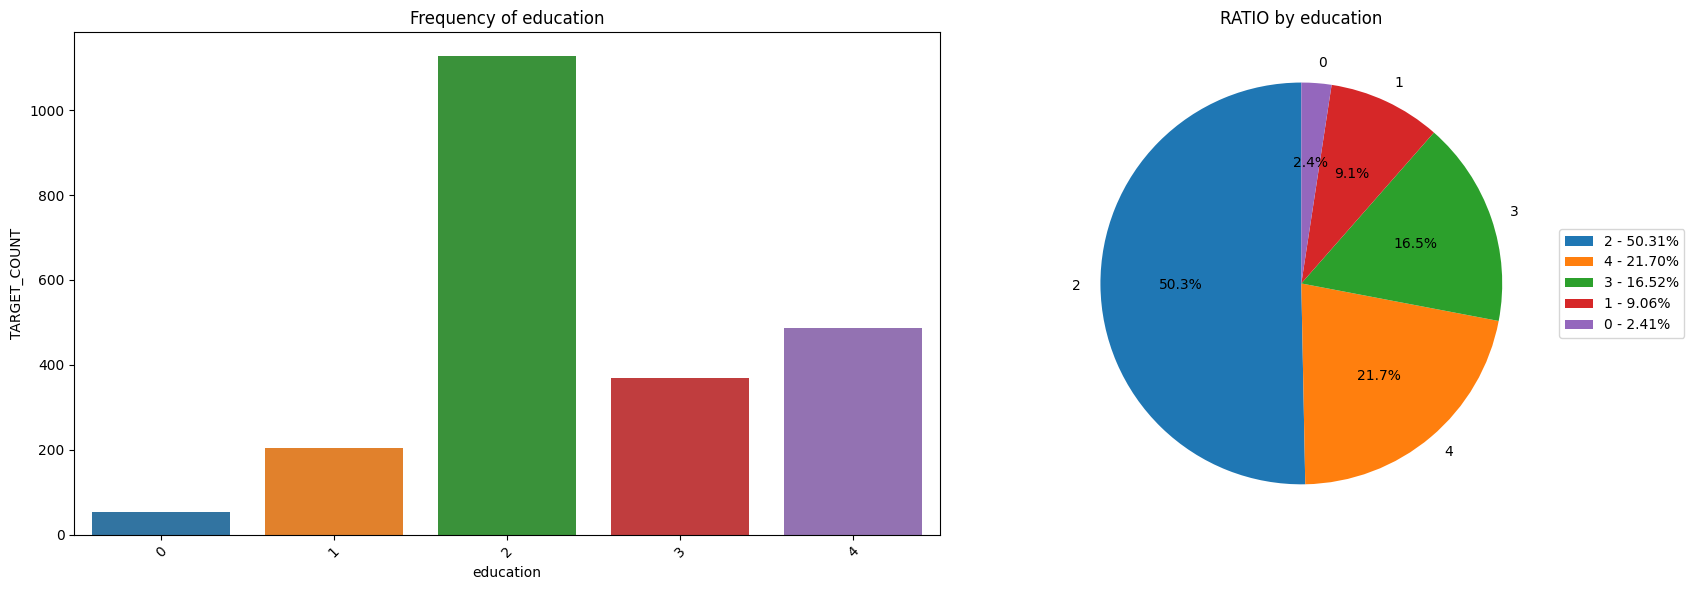

2024-11-18 11:34:32,669 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-18 11:34:32,674 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


               accepted_cmp3      Ratio
accepted_cmp3                          
0                       2077  92.723214
1                        163   7.276786
##########################################


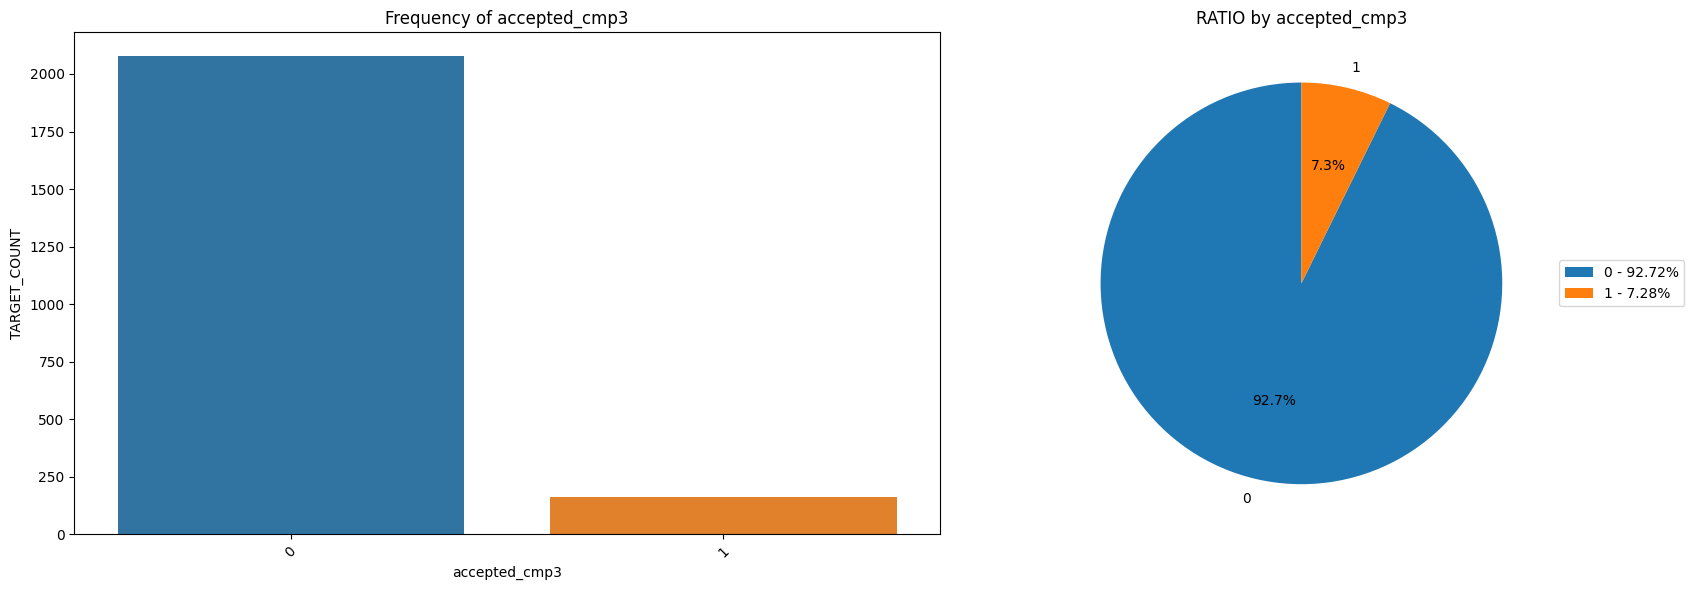

2024-11-18 11:34:32,860 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-18 11:34:32,865 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


               accepted_cmp4      Ratio
accepted_cmp4                          
0                       2073  92.544643
1                        167   7.455357
##########################################


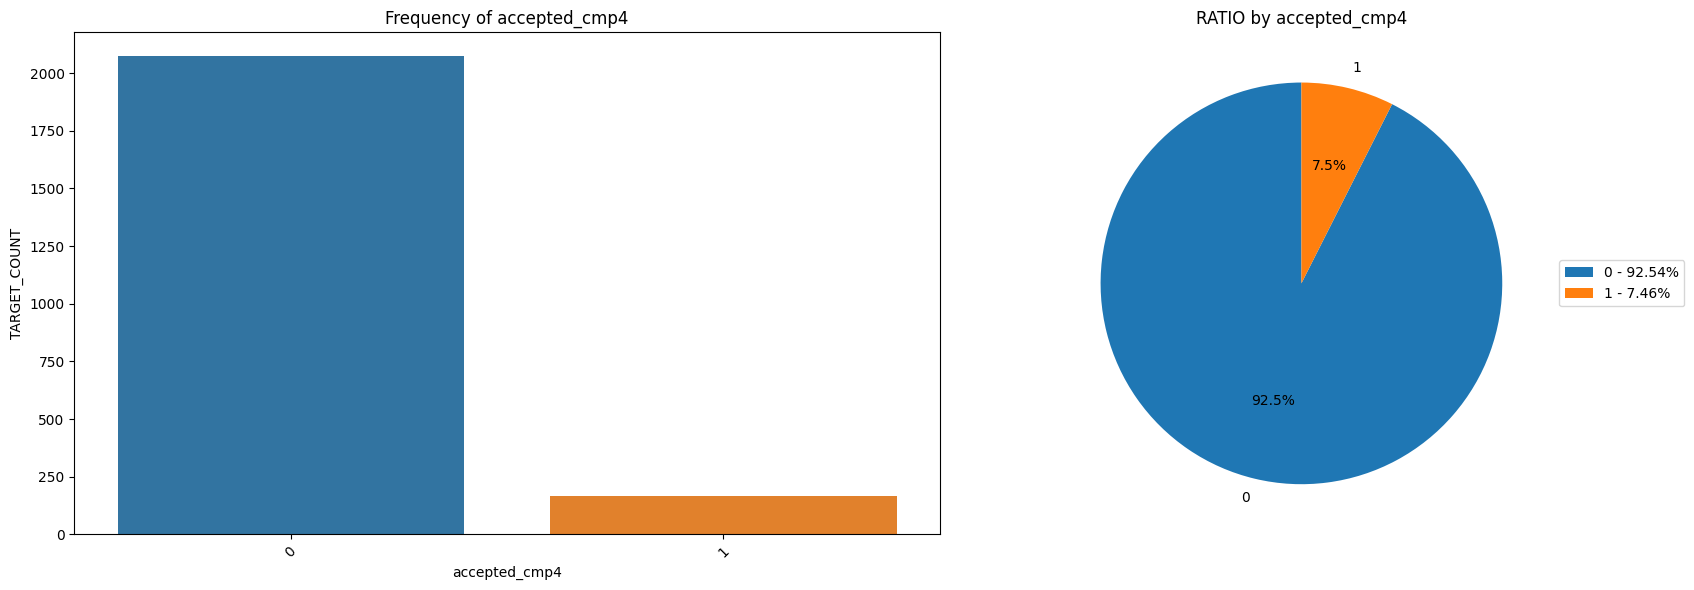

2024-11-18 11:34:33,000 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-18 11:34:33,004 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


               accepted_cmp5      Ratio
accepted_cmp5                          
0                       2077  92.723214
1                        163   7.276786
##########################################


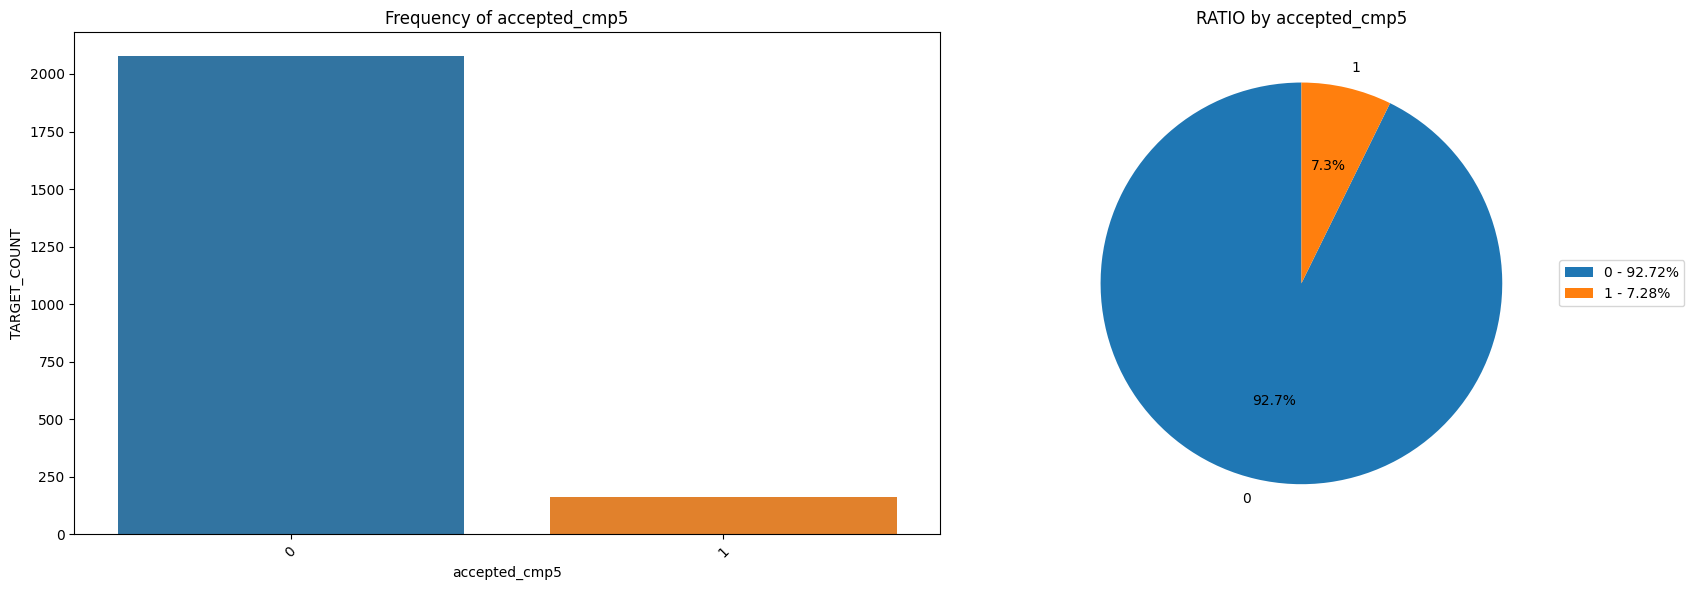

2024-11-18 11:34:33,137 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-18 11:34:33,141 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


               accepted_cmp1      Ratio
accepted_cmp1                          
0                       2096  93.571429
1                        144   6.428571
##########################################


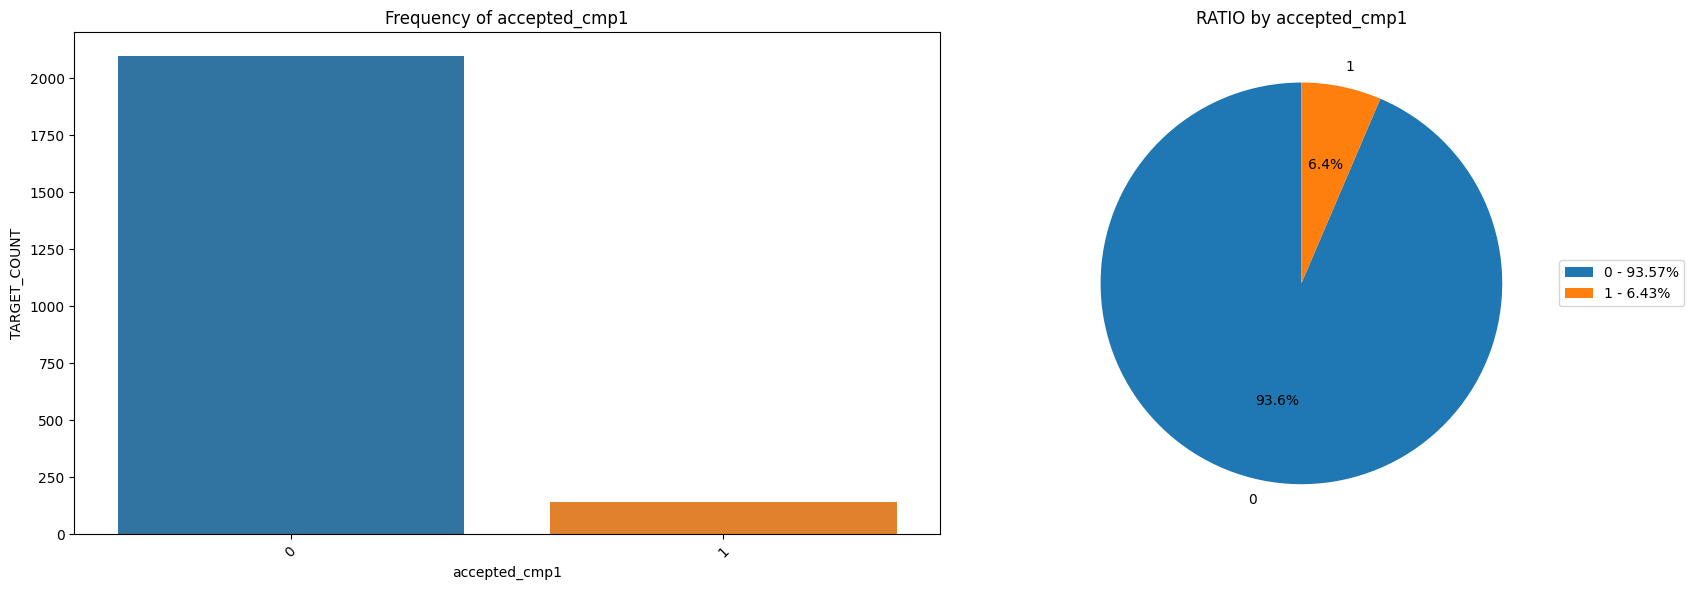

2024-11-18 11:34:33,272 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-18 11:34:33,276 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


               accepted_cmp2      Ratio
accepted_cmp2                          
0                       2210  98.660714
1                         30   1.339286
##########################################


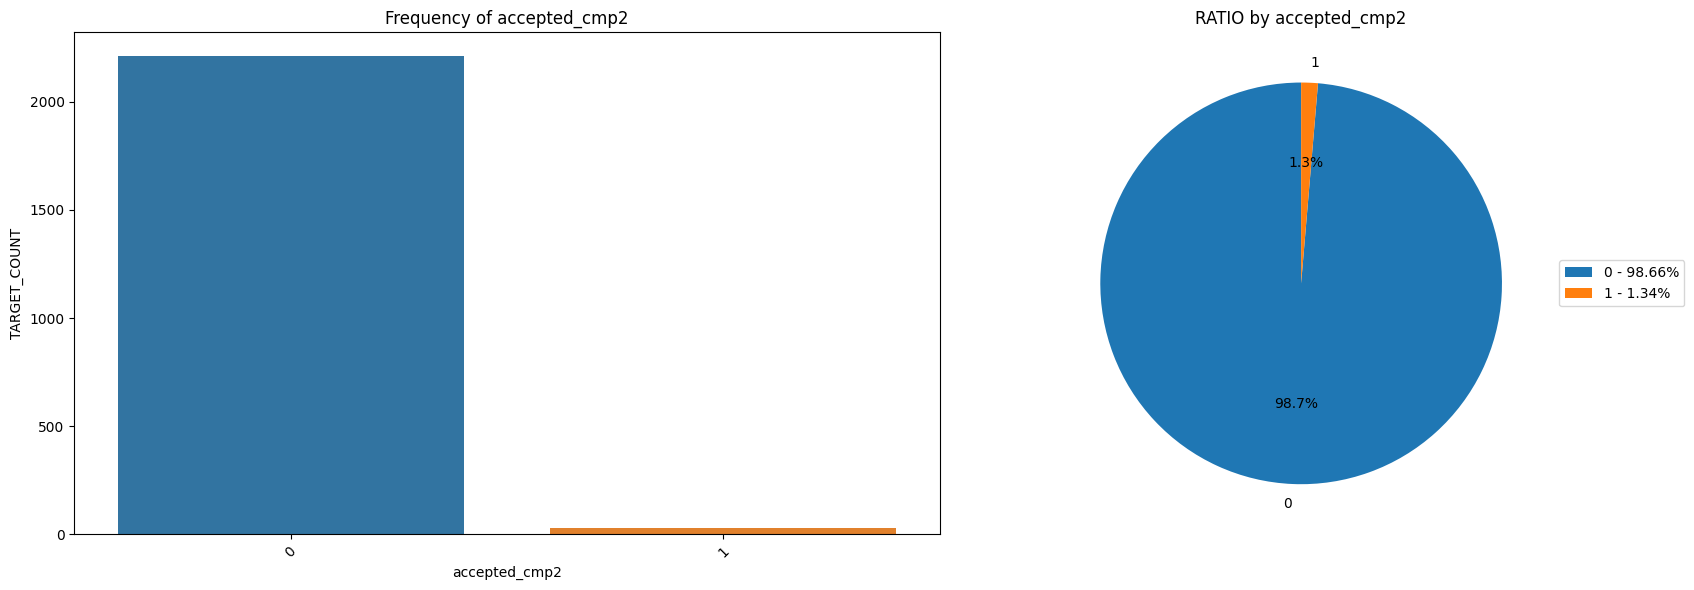

2024-11-18 11:34:33,452 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-18 11:34:33,456 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


          complain    Ratio
complain                   
0             2219  99.0625
1               21   0.9375
##########################################


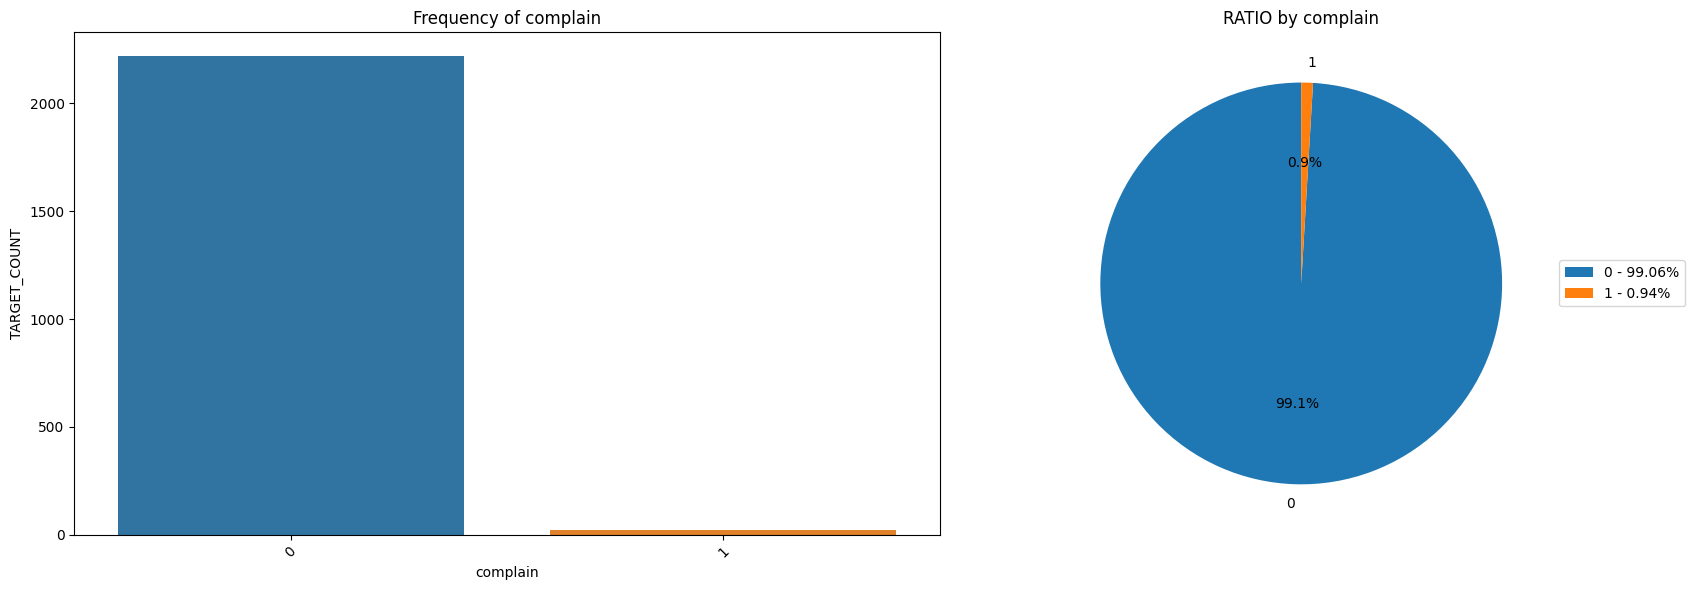

2024-11-18 11:34:33,580 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-18 11:34:33,584 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


          response      Ratio
response                     
0             1906  85.089286
1              334  14.910714
##########################################


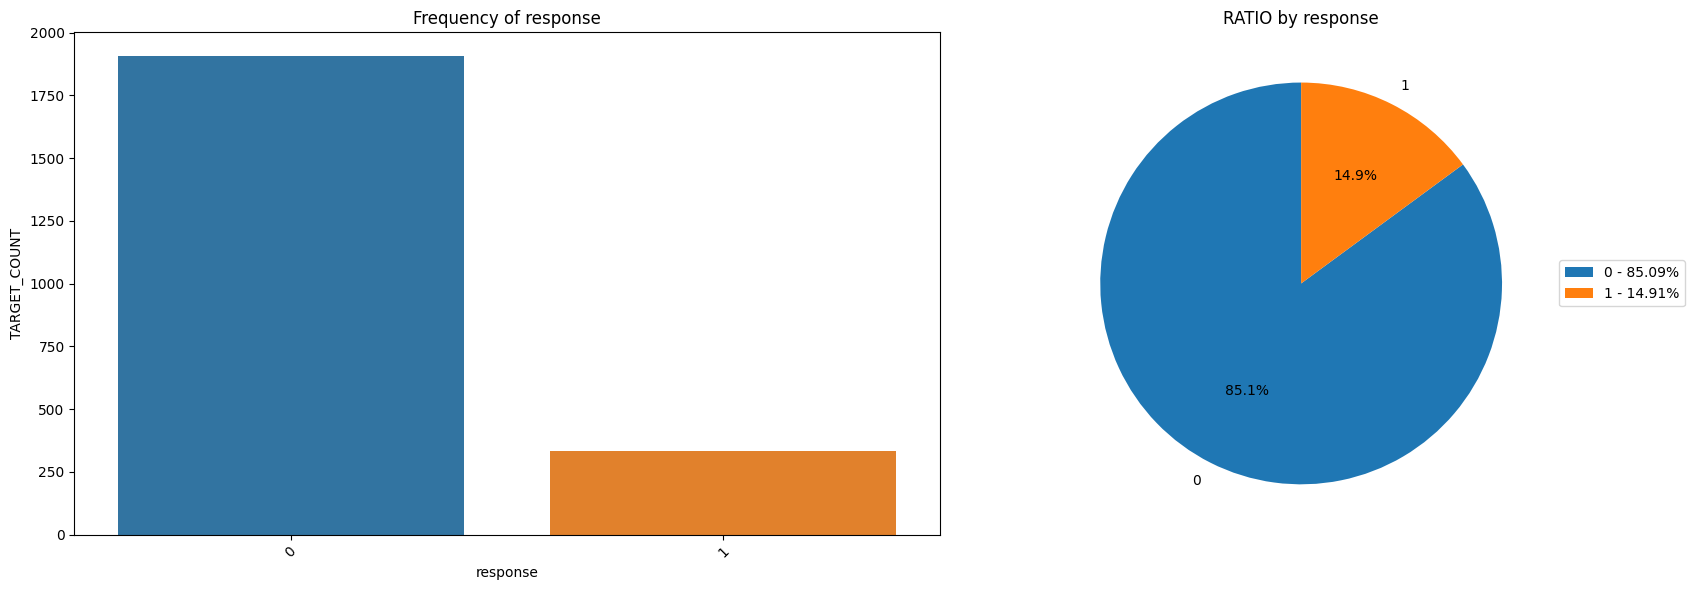

2024-11-18 11:34:33,710 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-18 11:34:33,714 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


          children      Ratio
children                     
1             1128  50.357143
0              638  28.482143
2              421  18.794643
3               53   2.366071
##########################################


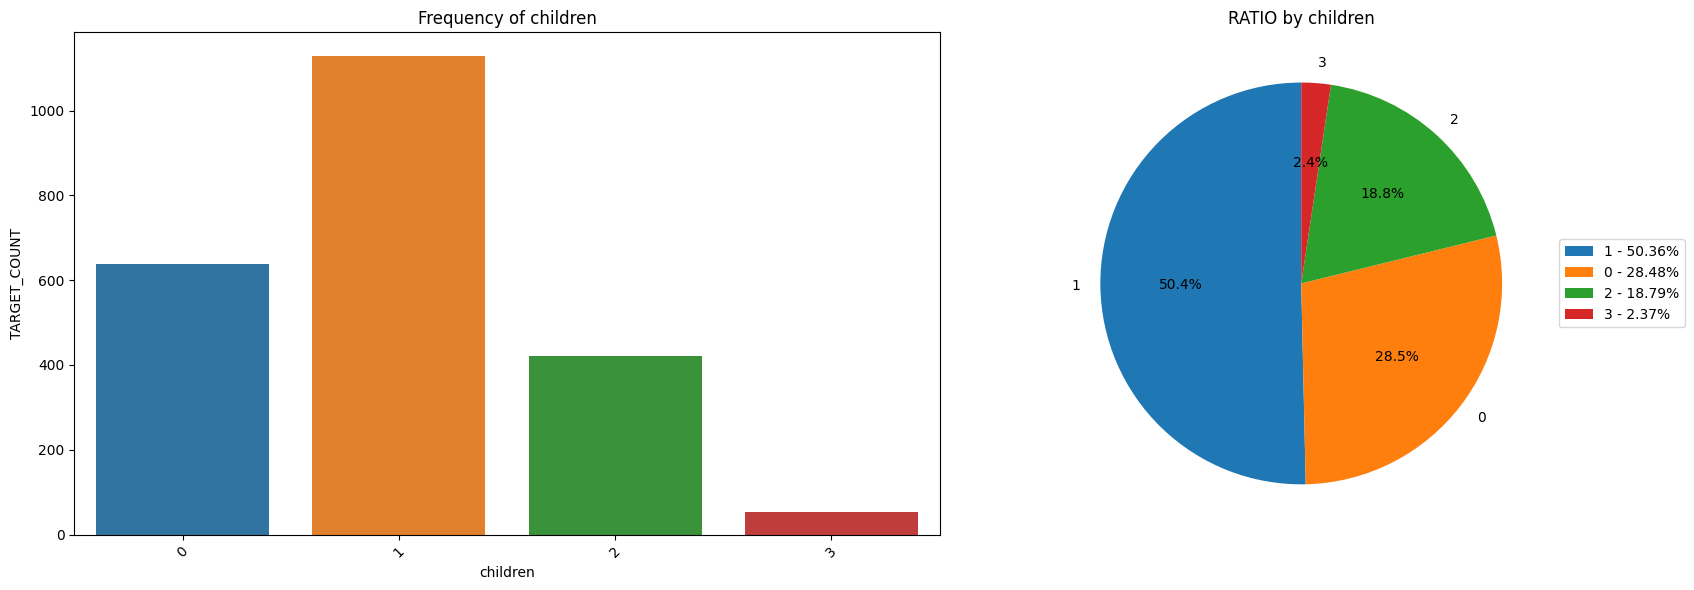

2024-11-18 11:34:33,897 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-18 11:34:33,900 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


             family_size      Ratio
family_size                        
3                    889  39.687500
2                    764  34.107143
4                    301  13.437500
1                    254  11.339286
5                     32   1.428571
##########################################


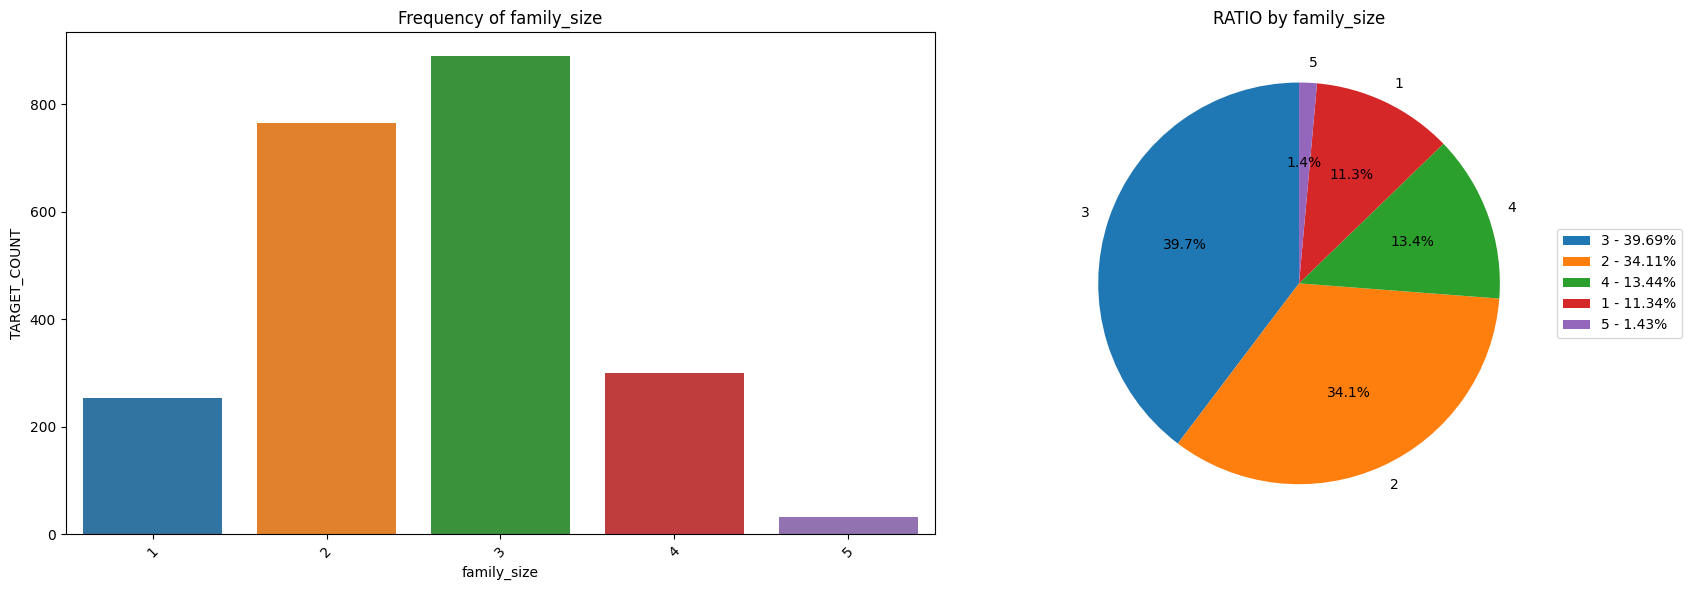

             total_promo      Ratio
total_promo                        
0                   1777  79.330357
1                    325  14.508929
2                     83   3.705357
3                     44   1.964286
4                     11   0.491071
##########################################


2024-11-18 11:34:34,093 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-18 11:34:34,098 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


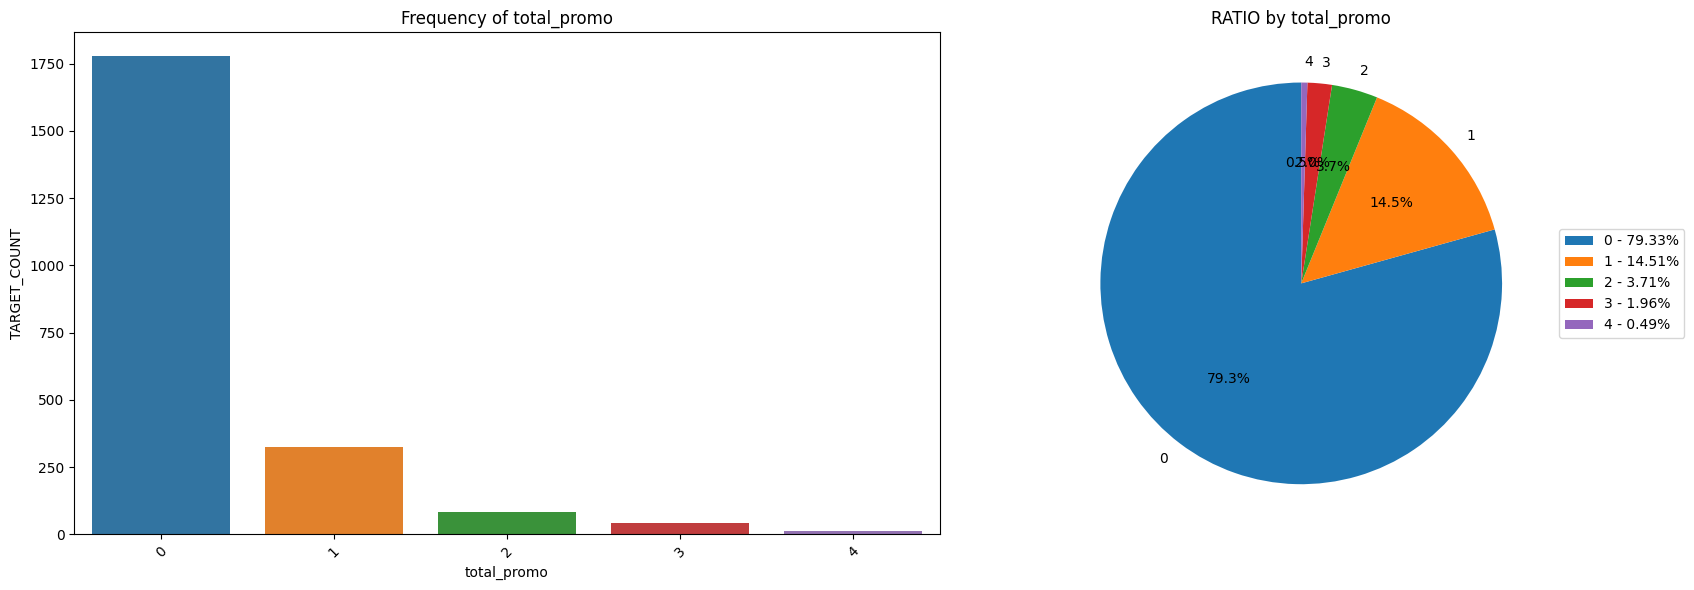

2024-11-18 11:34:34,245 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-18 11:34:34,248 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


                     offers_responded_to      Ratio
offers_responded_to                                
0                                   1631  72.812500
1                                    370  16.517857
2                                    142   6.339286
3                                     51   2.276786
4                                     36   1.607143
5                                     10   0.446429
##########################################


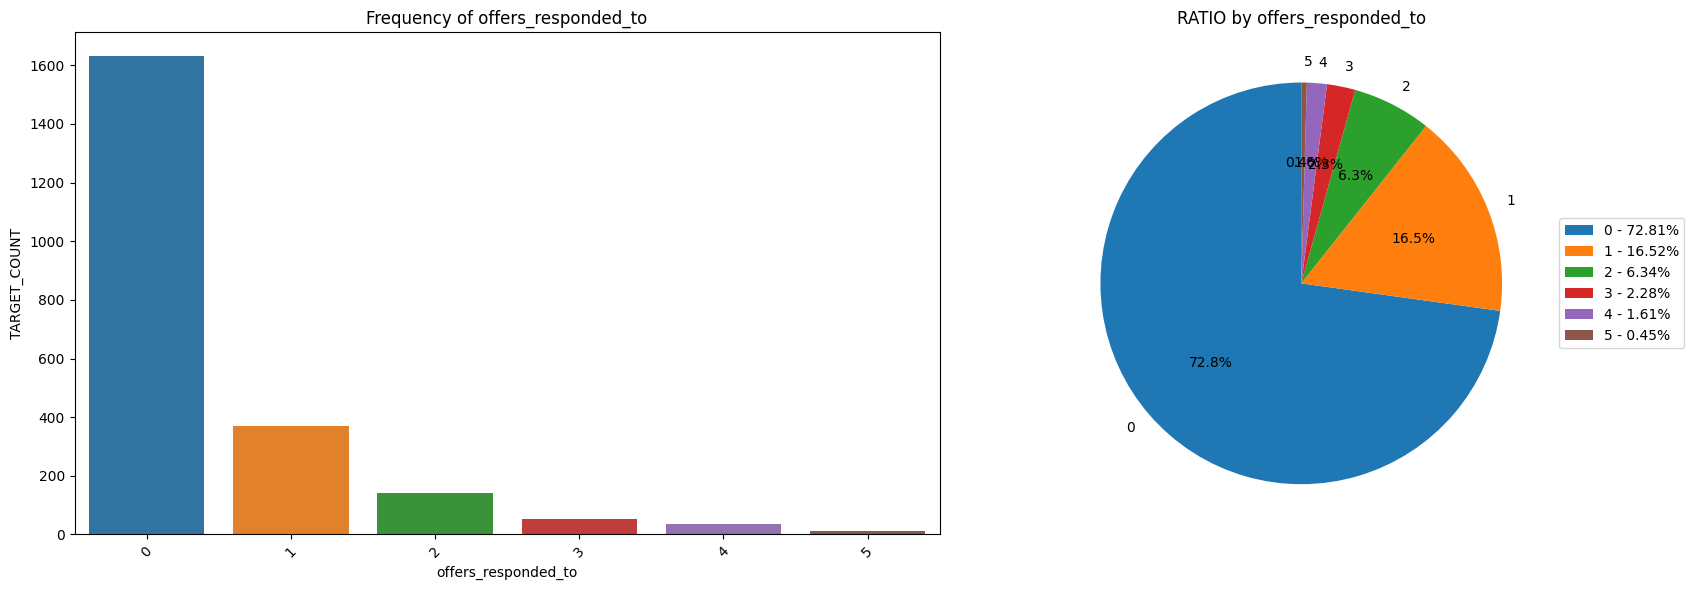

2024-11-18 11:34:34,407 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-18 11:34:34,411 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


                 parental_status      Ratio
parental_status                            
1                           1602  71.517857
0                            638  28.482143
##########################################


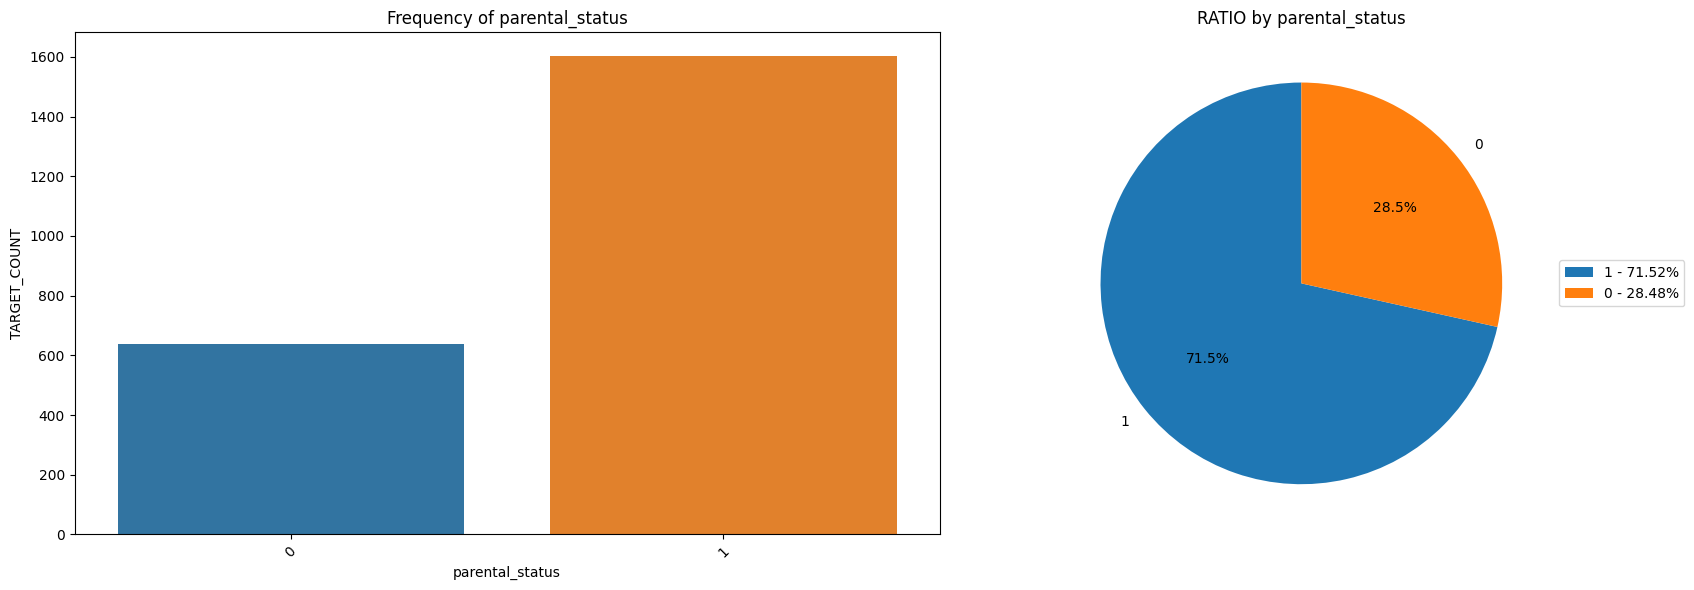

In [15]:
# Examination of categorical variables

for col in categorical_cols:
    cat_summary(data_eda, col,plot=True)

Numerical Column: income
##########################################
count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
5%        19101.050000
10%       24219.500000
20%       32230.000000
30%       38361.000000
40%       44944.200000
50%       51381.500000
60%       58169.600000
70%       65104.600000
80%       71634.800000
90%       79800.300000
95%       83927.000000
99%       94437.680000
max      666666.000000
Name: income, dtype: float64
##########################################


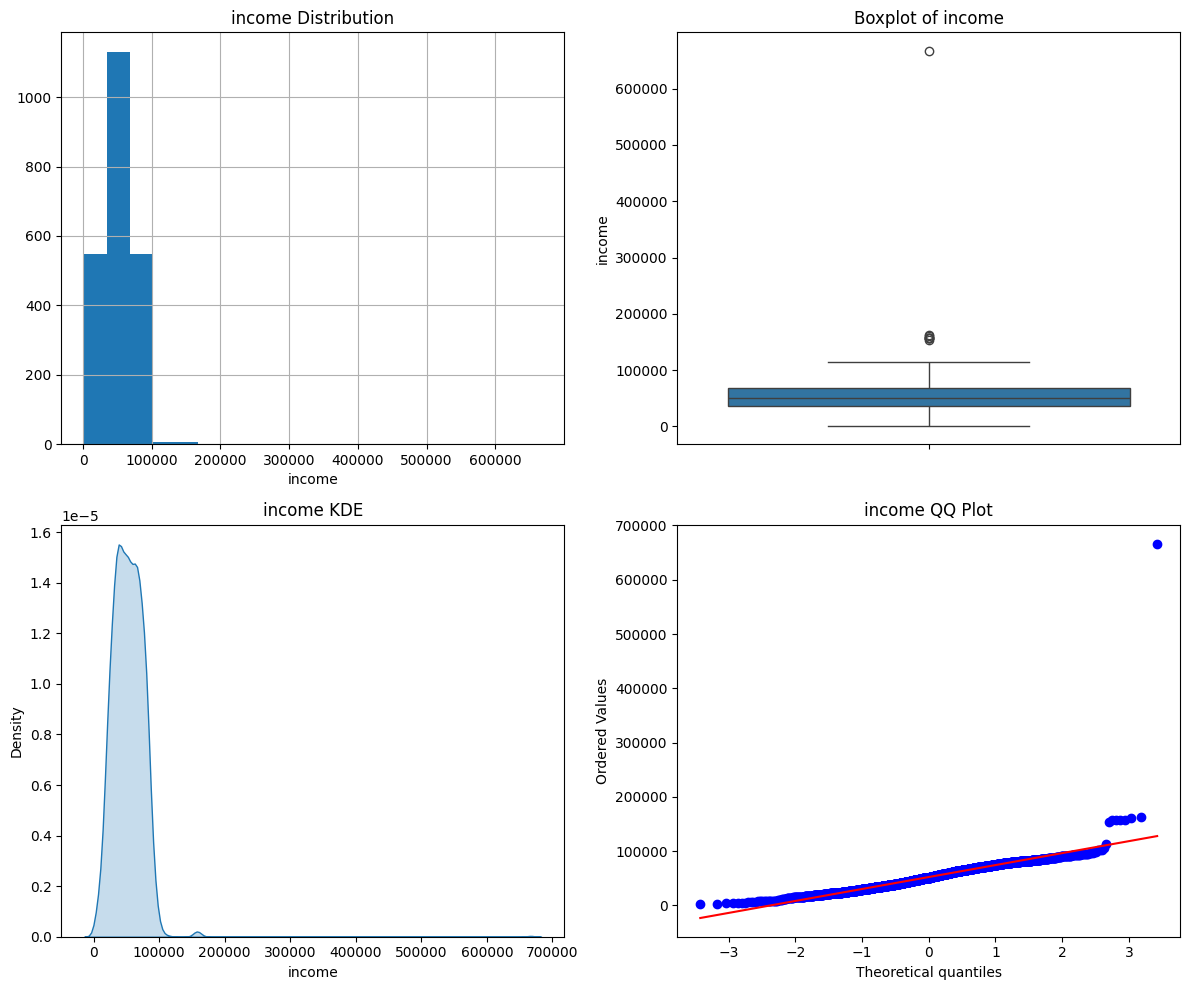

Numerical Column: recency
##########################################
count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
5%          4.000000
10%         9.000000
20%        19.000000
30%        29.000000
40%        39.000000
50%        49.000000
60%        59.000000
70%        69.000000
80%        79.000000
90%        89.000000
95%        94.000000
99%        98.000000
max        99.000000
Name: recency, dtype: float64
##########################################


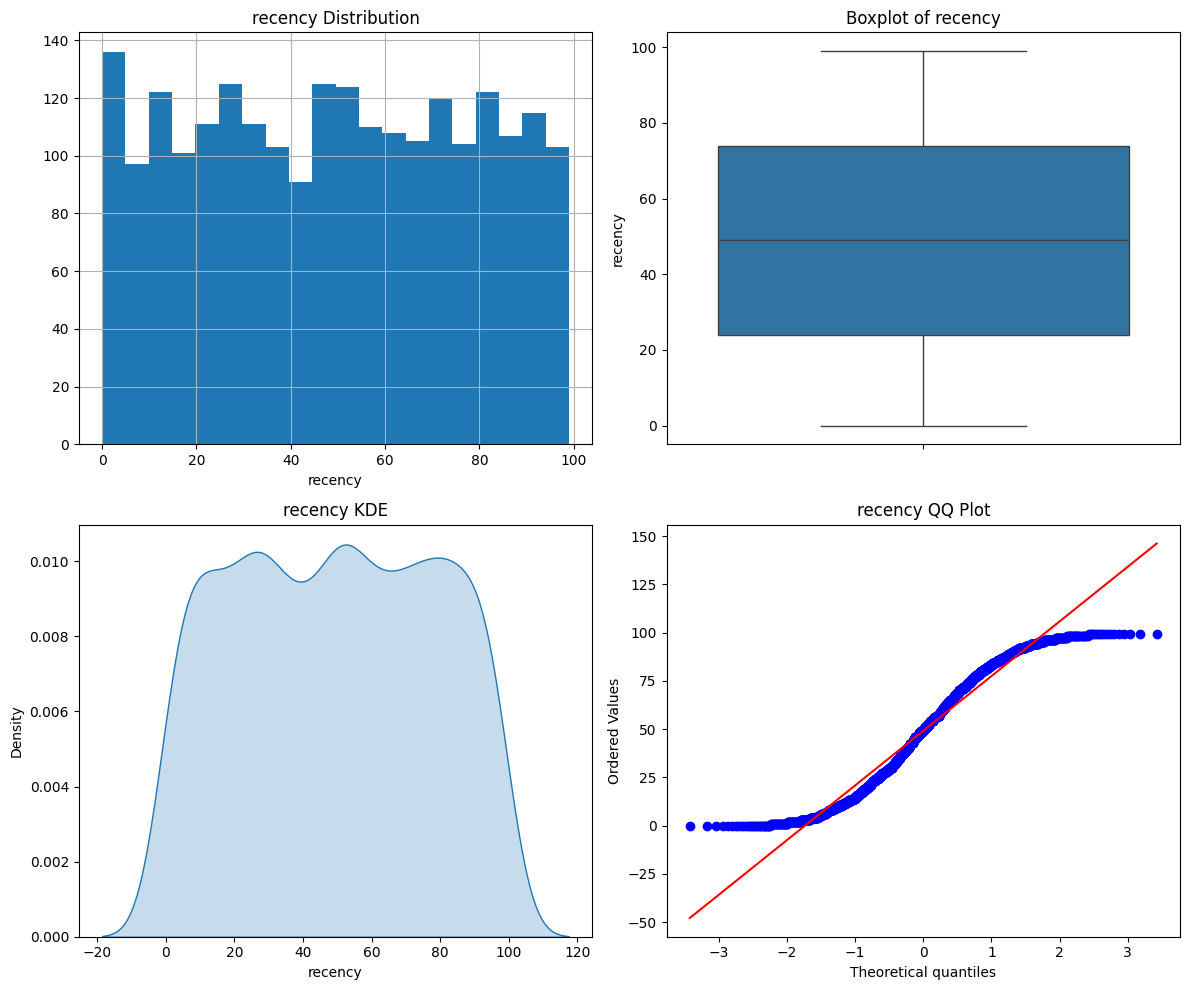

Numerical Column: mnt_wines
##########################################
count    2240.000000
mean      303.935714
std       336.597393
min         0.000000
5%          3.000000
10%         6.000000
20%        16.000000
30%        34.000000
40%        81.000000
50%       173.500000
60%       284.400000
70%       418.600000
80%       581.200000
90%       822.100000
95%      1000.000000
99%      1285.000000
max      1493.000000
Name: mnt_wines, dtype: float64
##########################################


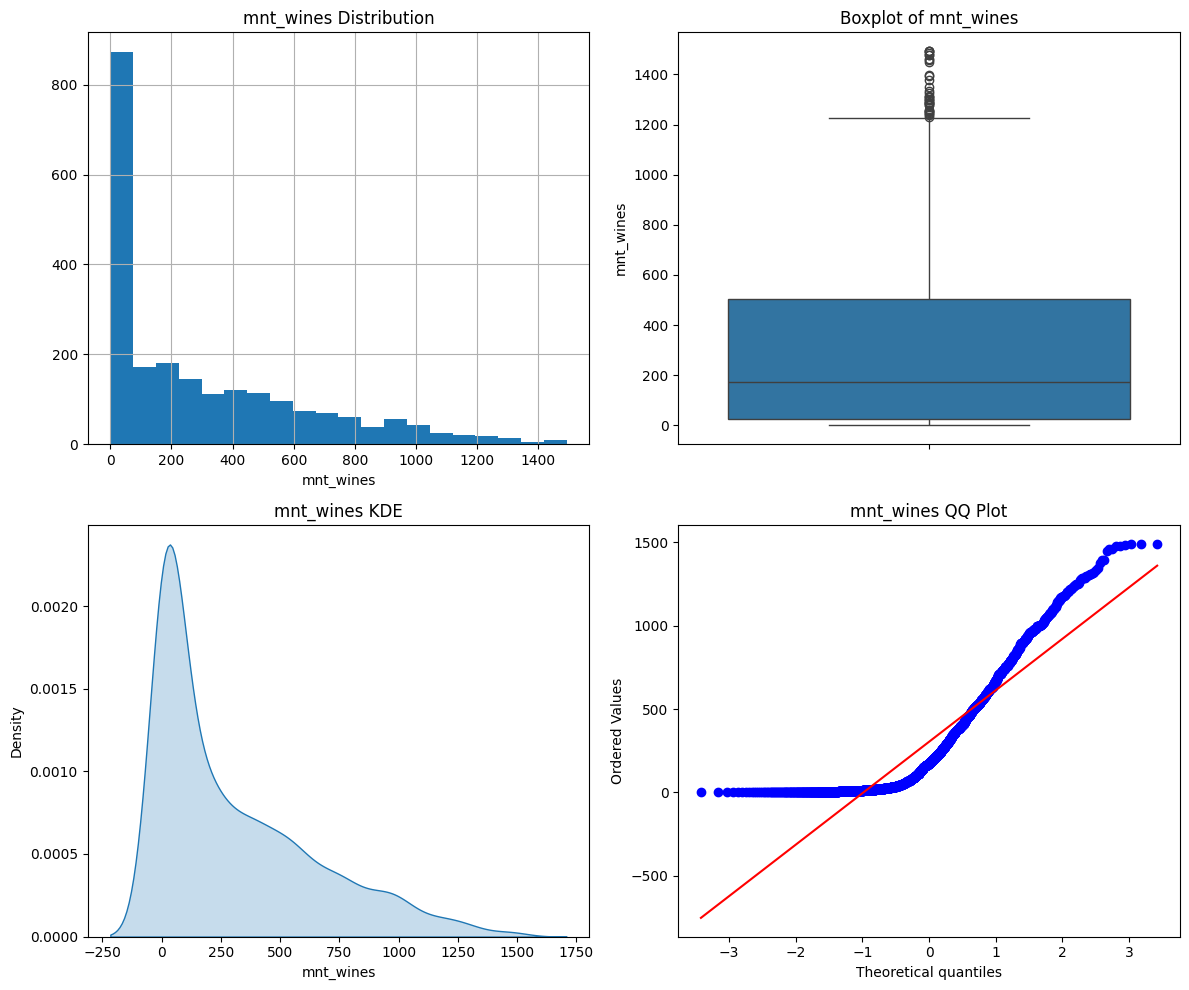

Numerical Column: mnt_fruits
##########################################
count    2240.000000
mean       26.302232
std        39.773434
min         0.000000
5%          0.000000
10%         0.000000
20%         1.000000
30%         2.000000
40%         4.000000
50%         8.000000
60%        15.000000
70%        25.000000
80%        44.000000
90%        83.000000
95%       123.000000
99%       172.000000
max       199.000000
Name: mnt_fruits, dtype: float64
##########################################


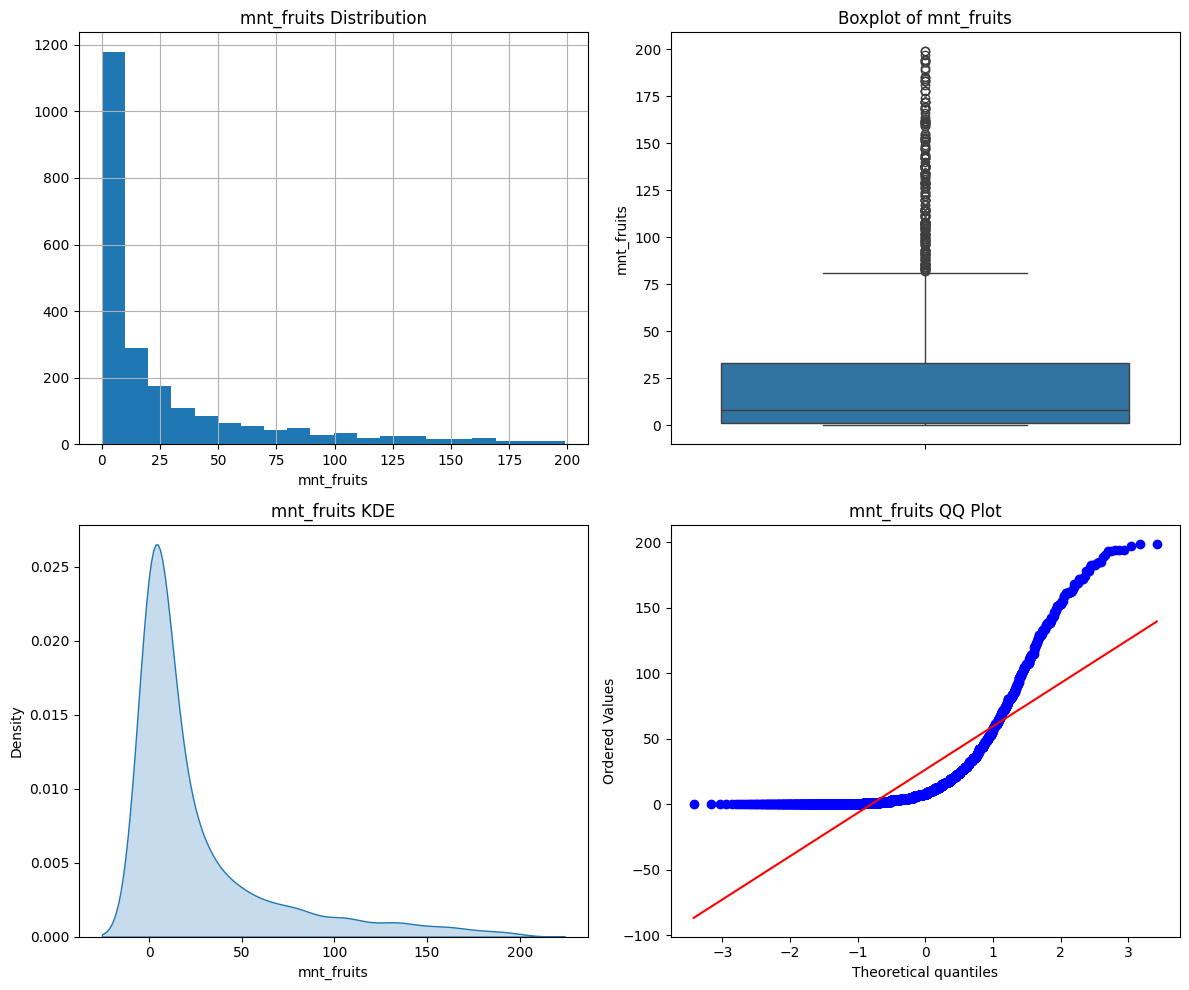

Numerical Column: mnt_meat_products
##########################################
count    2240.000000
mean      166.950000
std       225.715373
min         0.000000
5%          4.000000
10%         7.000000
20%        12.000000
30%        20.000000
40%        35.000000
50%        67.000000
60%       108.400000
70%       177.000000
80%       298.400000
90%       499.000000
95%       687.100000
99%       915.000000
max      1725.000000
Name: mnt_meat_products, dtype: float64
##########################################


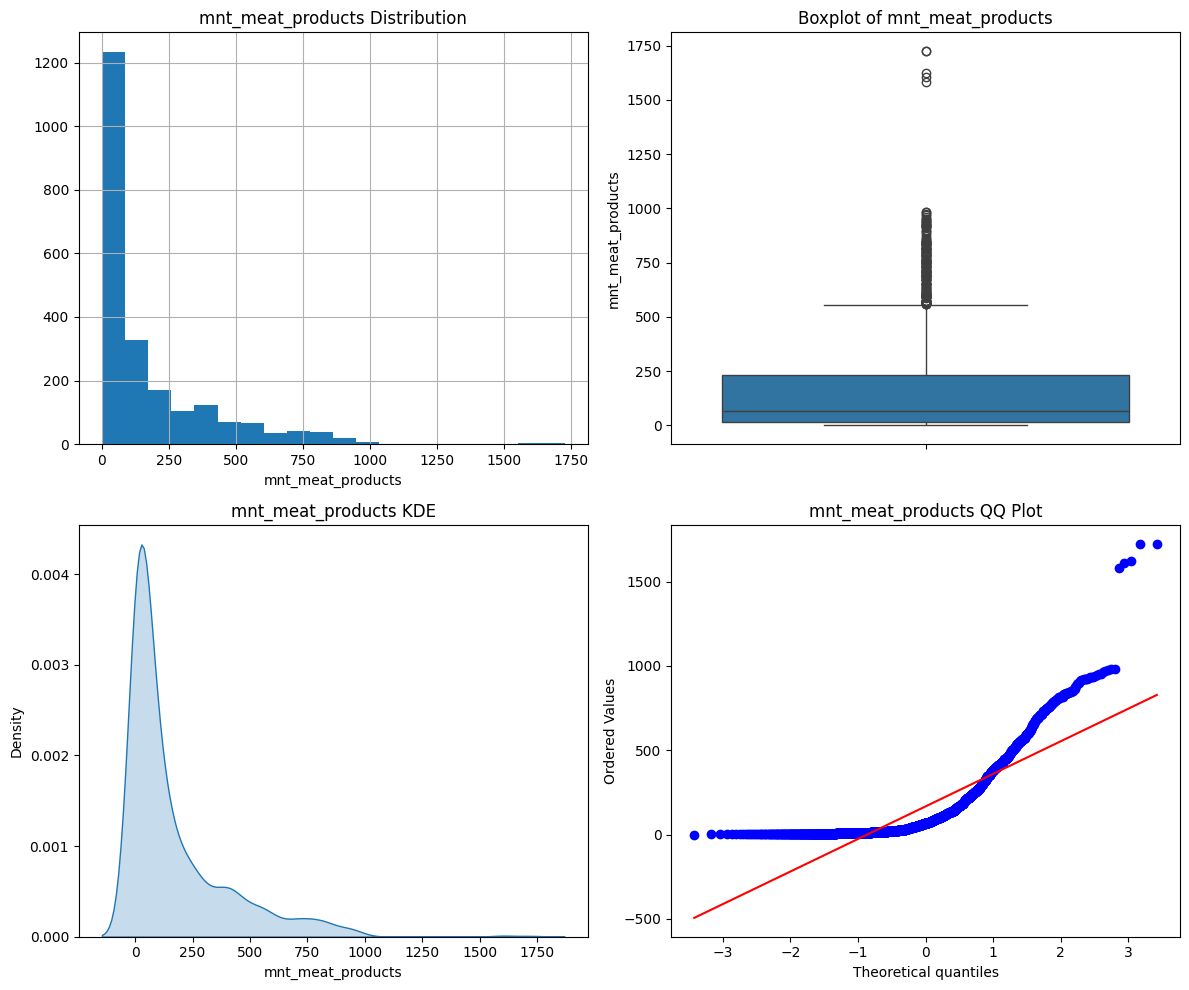

Numerical Column: mnt_fish_products
##########################################
count    2240.000000
mean       37.525446
std        54.628979
min         0.000000
5%          0.000000
10%         0.000000
20%         2.000000
30%         3.000000
40%         7.000000
50%        12.000000
60%        20.000000
70%        37.000000
80%        65.000000
90%       120.000000
95%       168.050000
99%       226.220000
max       259.000000
Name: mnt_fish_products, dtype: float64
##########################################


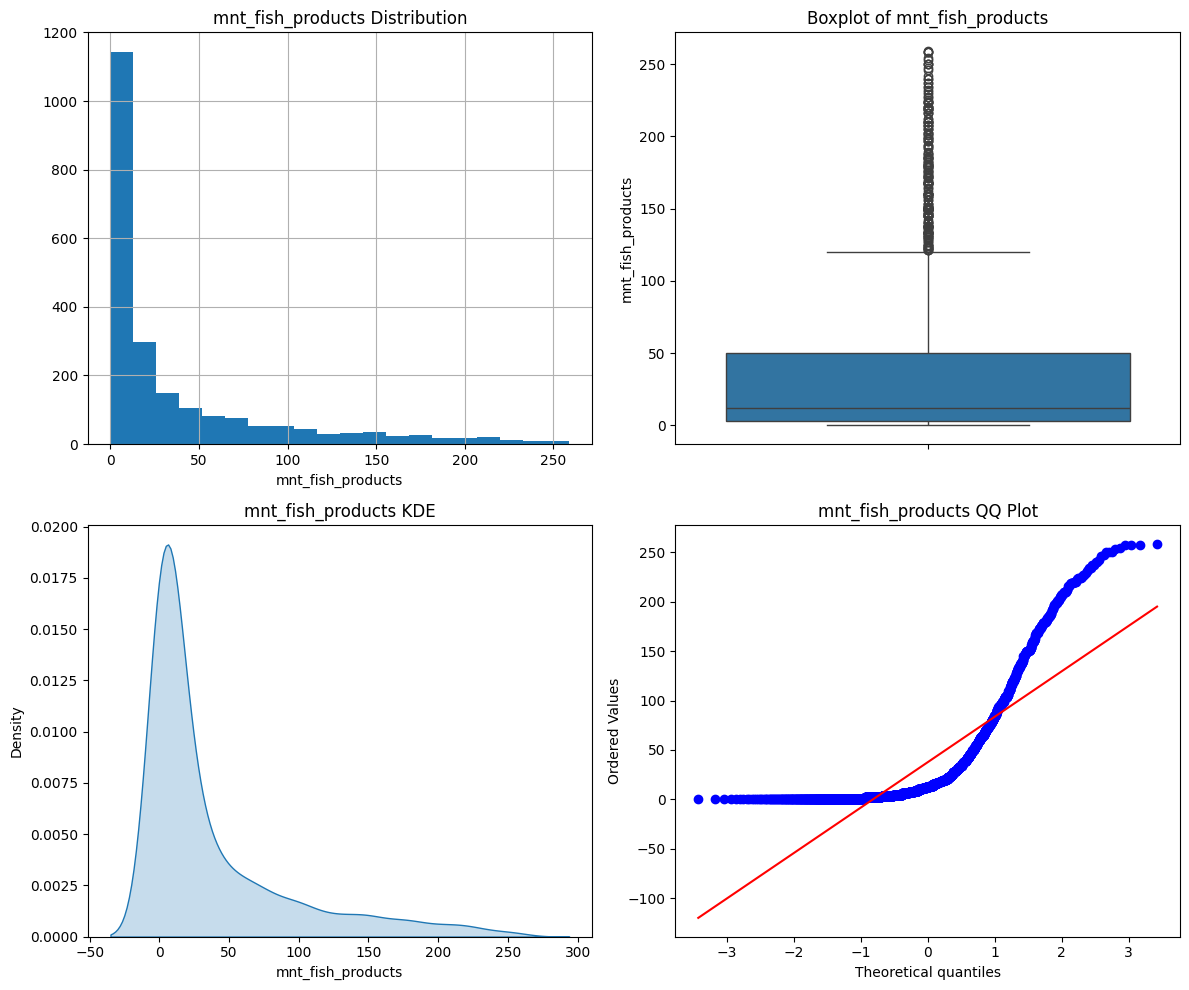

Numerical Column: mnt_sweet_products
##########################################
count    2240.000000
mean       27.062946
std        41.280498
min         0.000000
5%          0.000000
10%         0.000000
20%         1.000000
30%         2.000000
40%         5.000000
50%         8.000000
60%        14.000000
70%        26.000000
80%        44.200000
90%        89.000000
95%       126.000000
99%       177.220000
max       263.000000
Name: mnt_sweet_products, dtype: float64
##########################################


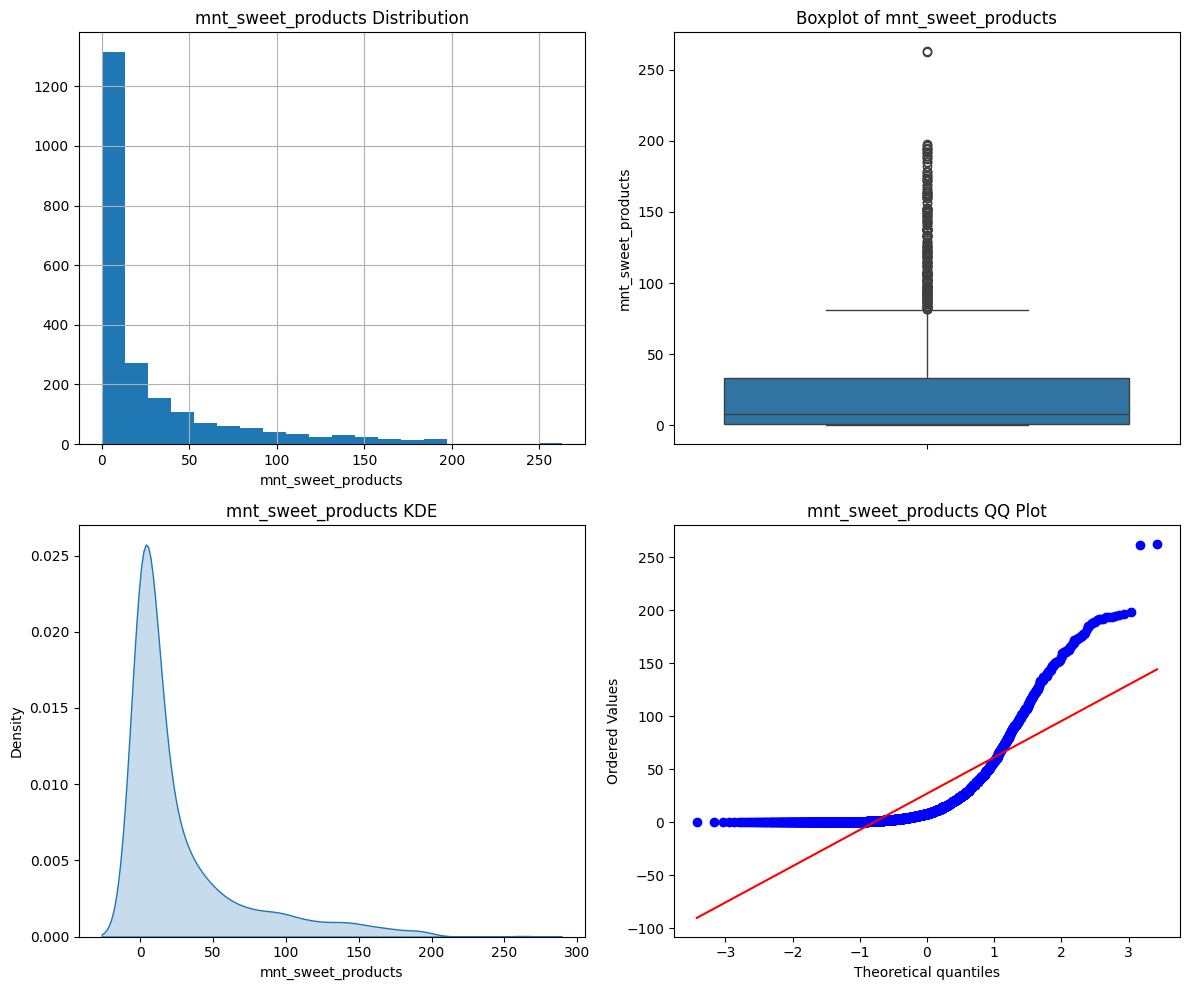

Numerical Column: mnt_gold_prods
##########################################
count    2240.000000
mean       44.021875
std        52.167439
min         0.000000
5%          1.000000
10%         3.000000
20%         6.000000
30%        11.000000
40%        17.000000
50%        24.000000
60%        34.000000
70%        46.000000
80%        73.000000
90%       122.000000
95%       165.050000
99%       227.000000
max       362.000000
Name: mnt_gold_prods, dtype: float64
##########################################


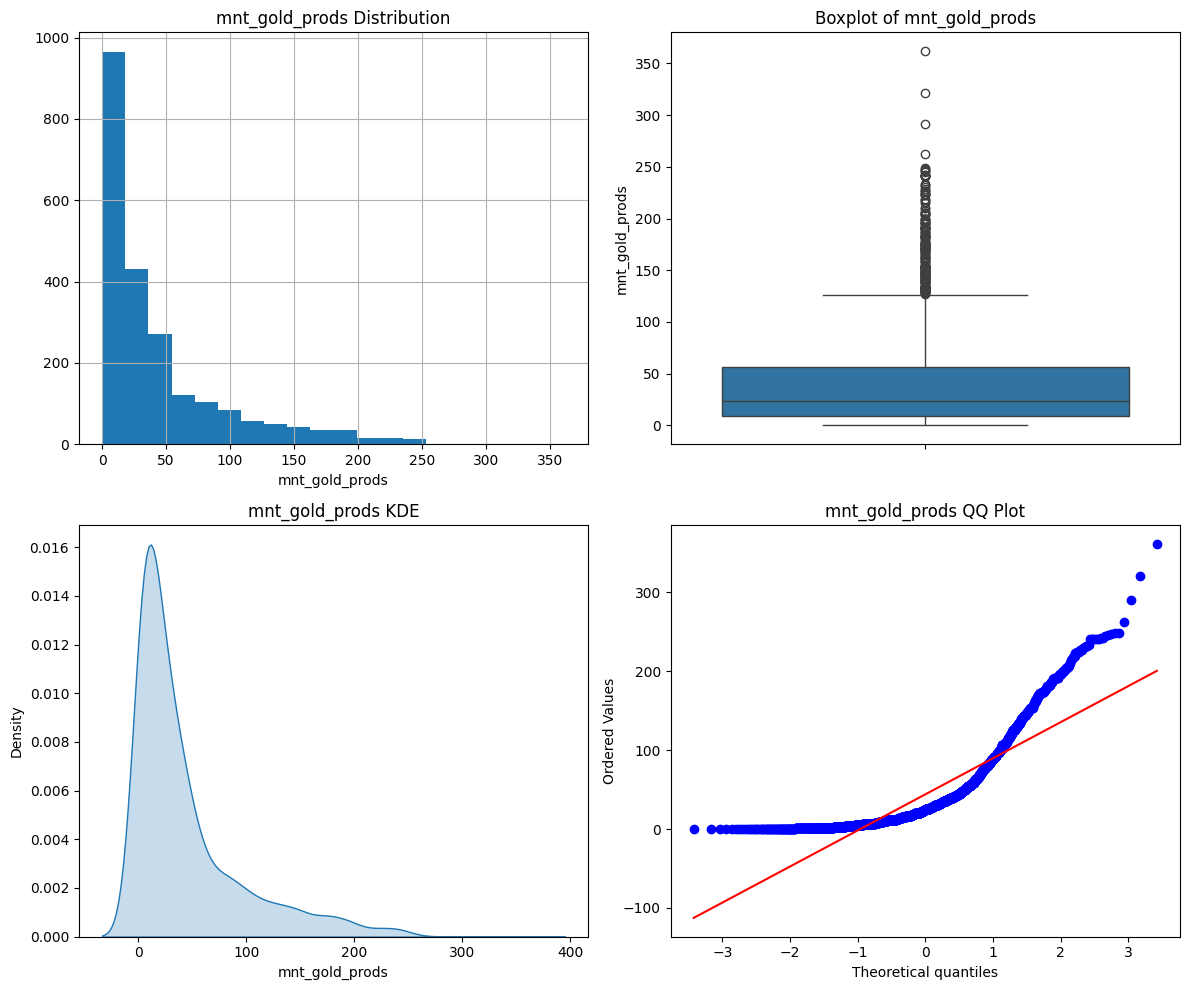

Numerical Column: num_deals_purchases
##########################################
count    2240.000000
mean        2.325000
std         1.932238
min         0.000000
5%          1.000000
10%         1.000000
20%         1.000000
30%         1.000000
40%         1.000000
50%         2.000000
60%         2.000000
70%         3.000000
80%         3.000000
90%         5.000000
95%         6.000000
99%        10.000000
max        15.000000
Name: num_deals_purchases, dtype: float64
##########################################


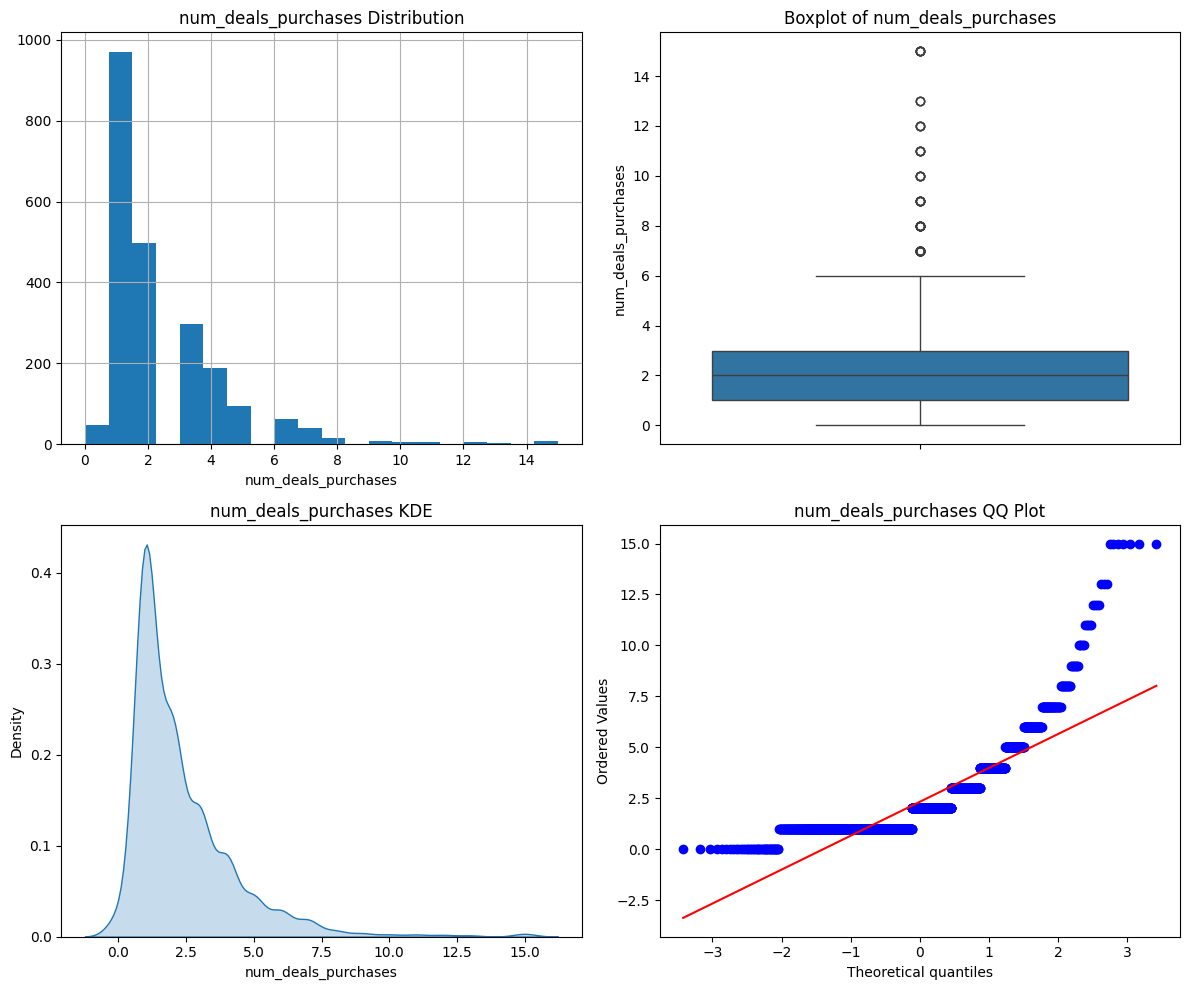

Numerical Column: num_web_purchases
##########################################
count    2240.000000
mean        4.084821
std         2.778714
min         0.000000
5%          1.000000
10%         1.000000
20%         2.000000
30%         2.000000
40%         3.000000
50%         4.000000
60%         4.000000
70%         5.000000
80%         6.000000
90%         8.000000
95%         9.000000
99%        11.000000
max        27.000000
Name: num_web_purchases, dtype: float64
##########################################


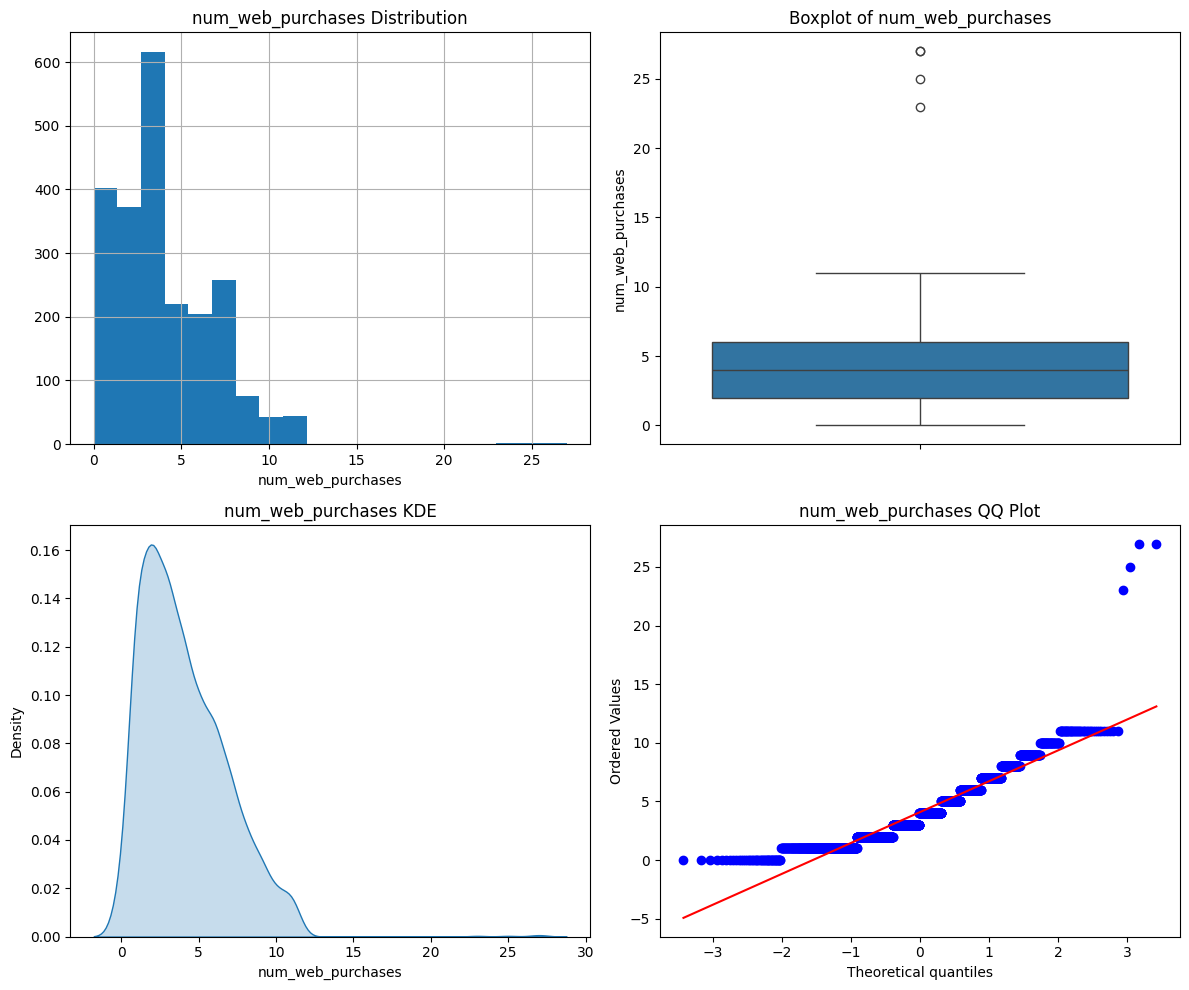

Numerical Column: num_catalog_purchases
##########################################
count    2240.000000
mean        2.662054
std         2.923101
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         1.000000
40%         1.000000
50%         2.000000
60%         2.000000
70%         4.000000
80%         5.000000
90%         7.000000
95%         9.000000
99%        10.610000
max        28.000000
Name: num_catalog_purchases, dtype: float64
##########################################


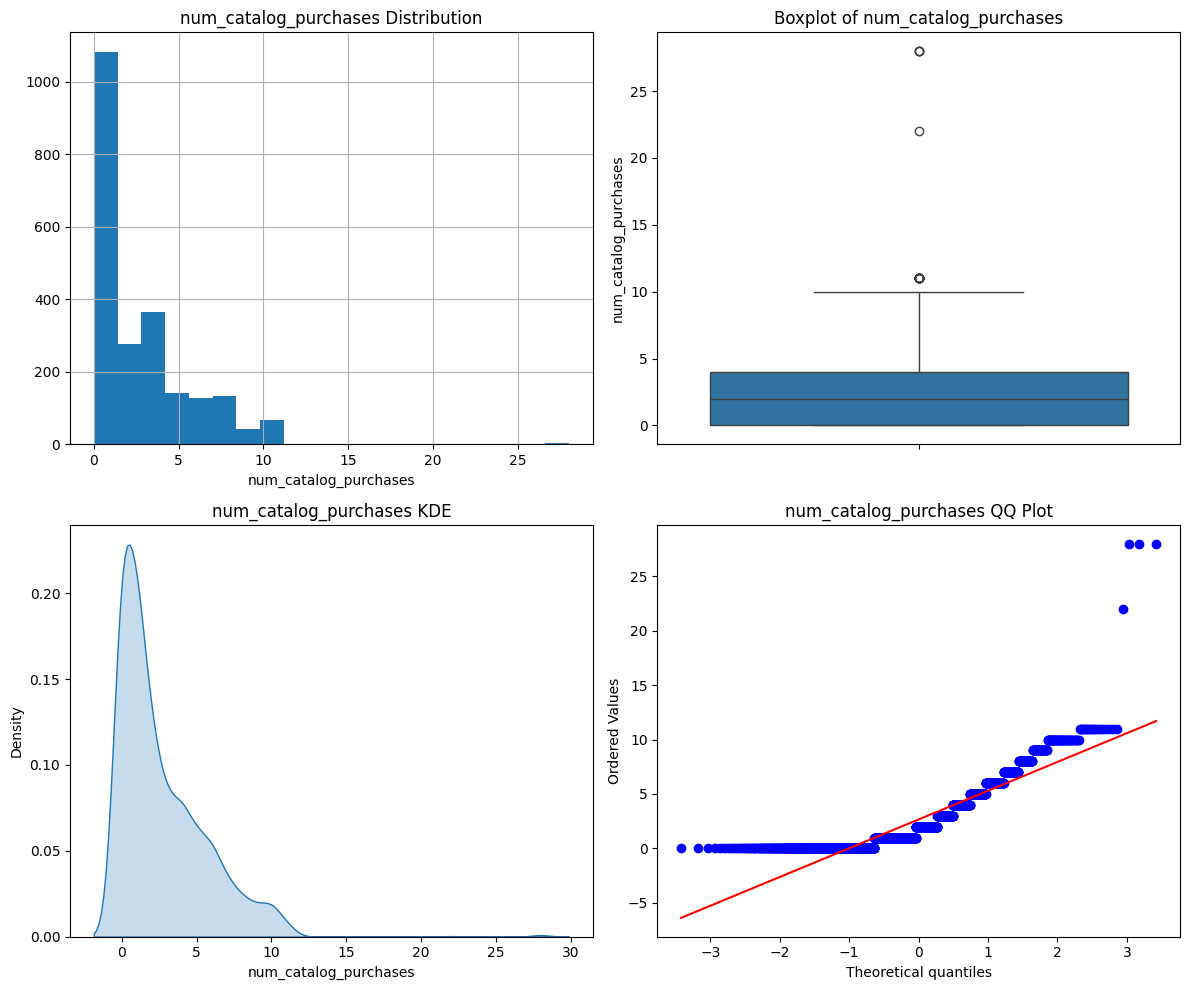

Numerical Column: num_store_purchases
##########################################
count    2240.000000
mean        5.790179
std         3.250958
min         0.000000
5%          2.000000
10%         2.000000
20%         3.000000
30%         3.000000
40%         4.000000
50%         5.000000
60%         6.000000
70%         7.000000
80%         9.000000
90%        11.000000
95%        12.000000
99%        13.000000
max        13.000000
Name: num_store_purchases, dtype: float64
##########################################


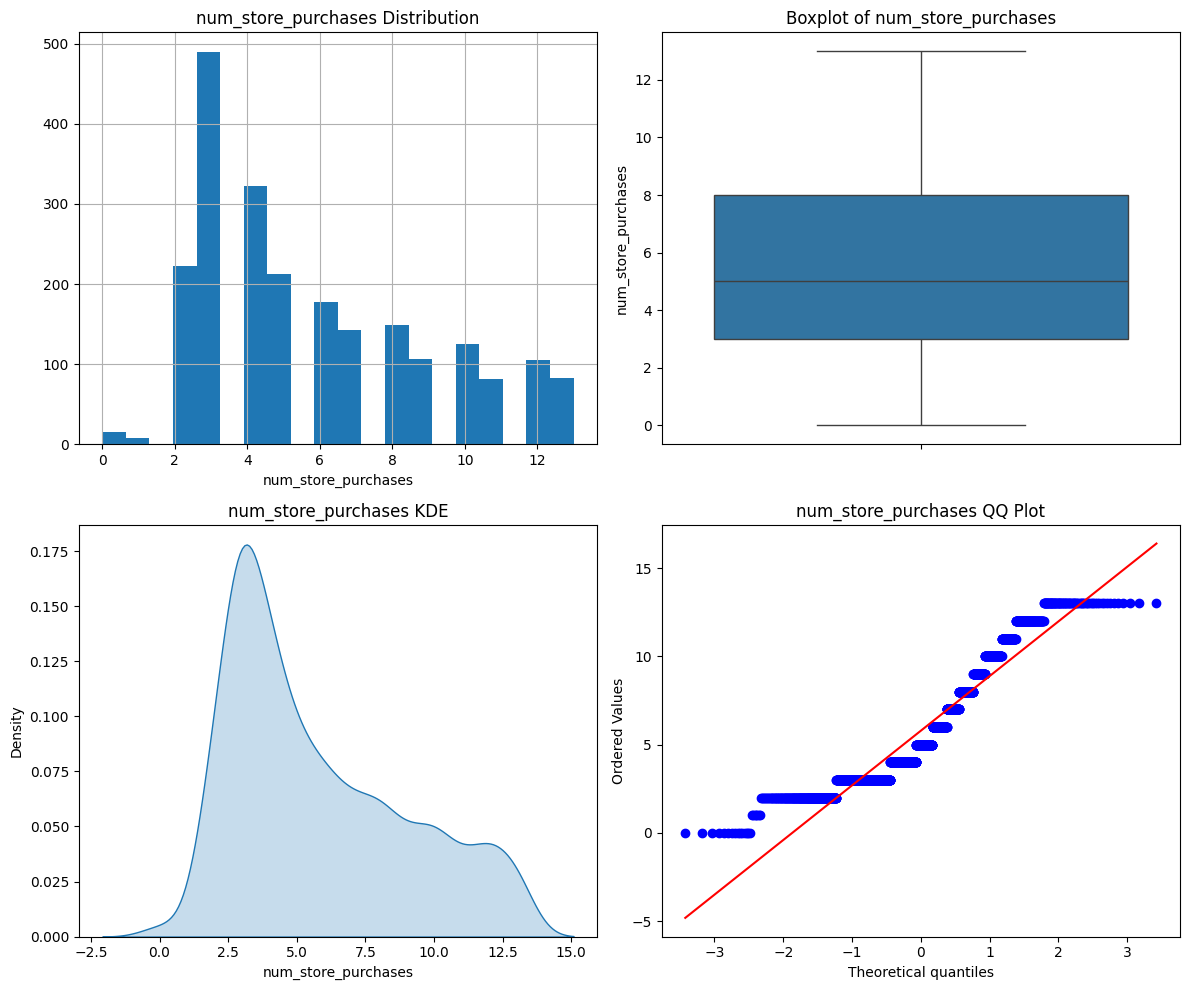

Numerical Column: num_web_visits_month
##########################################
count    2240.000000
mean        5.316518
std         2.426645
min         0.000000
5%          1.000000
10%         2.000000
20%         3.000000
30%         4.000000
40%         5.000000
50%         6.000000
60%         6.000000
70%         7.000000
80%         7.000000
90%         8.000000
95%         8.000000
99%         9.000000
max        20.000000
Name: num_web_visits_month, dtype: float64
##########################################


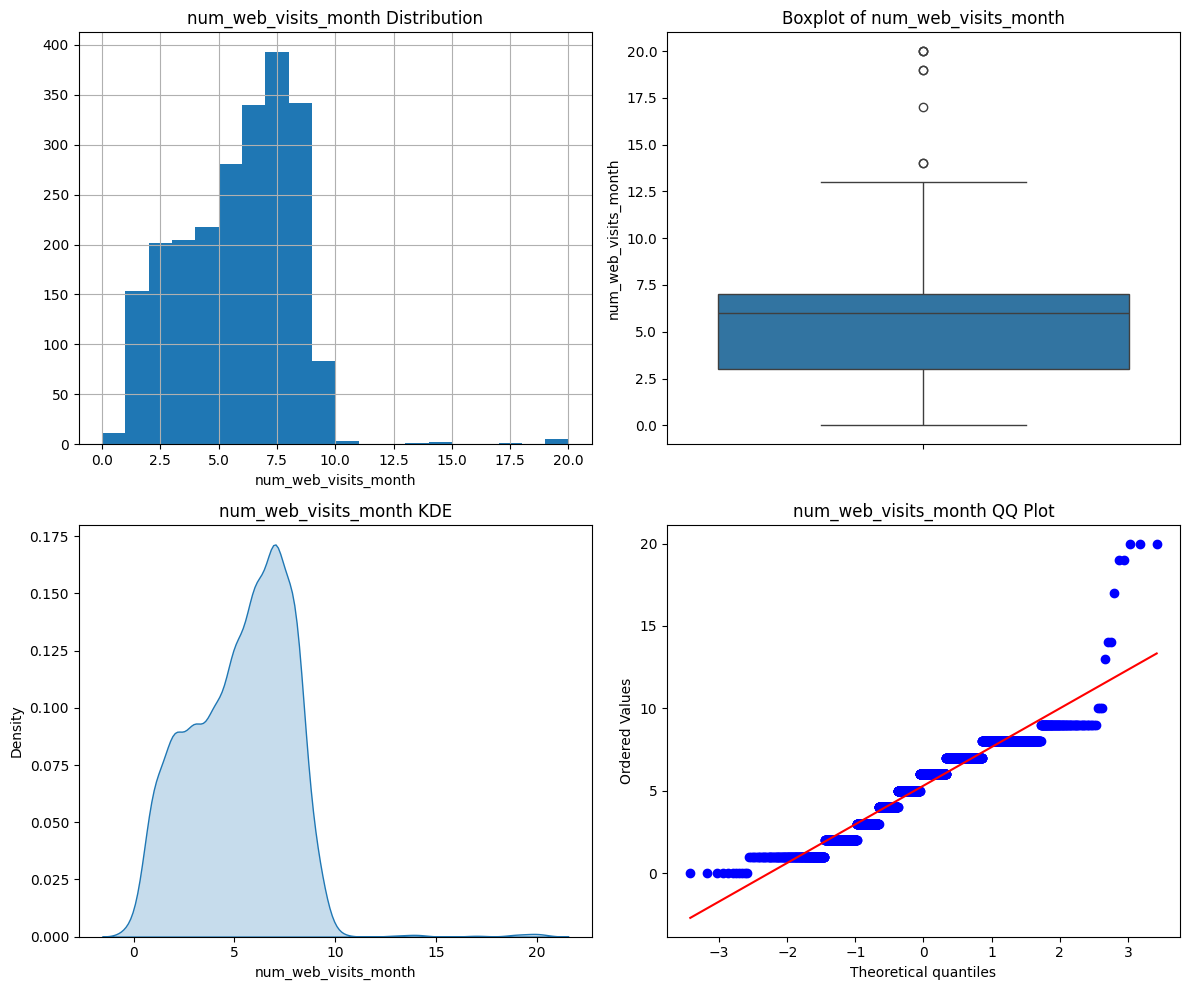

Numerical Column: age
##########################################
count    2240.000000
mean       55.194196
std        11.984069
min        28.000000
5%         36.000000
10%        40.000000
20%        45.000000
30%        48.000000
40%        51.000000
50%        54.000000
60%        58.000000
70%        62.000000
80%        67.000000
90%        72.000000
95%        74.000000
99%        79.000000
max       131.000000
Name: age, dtype: float64
##########################################


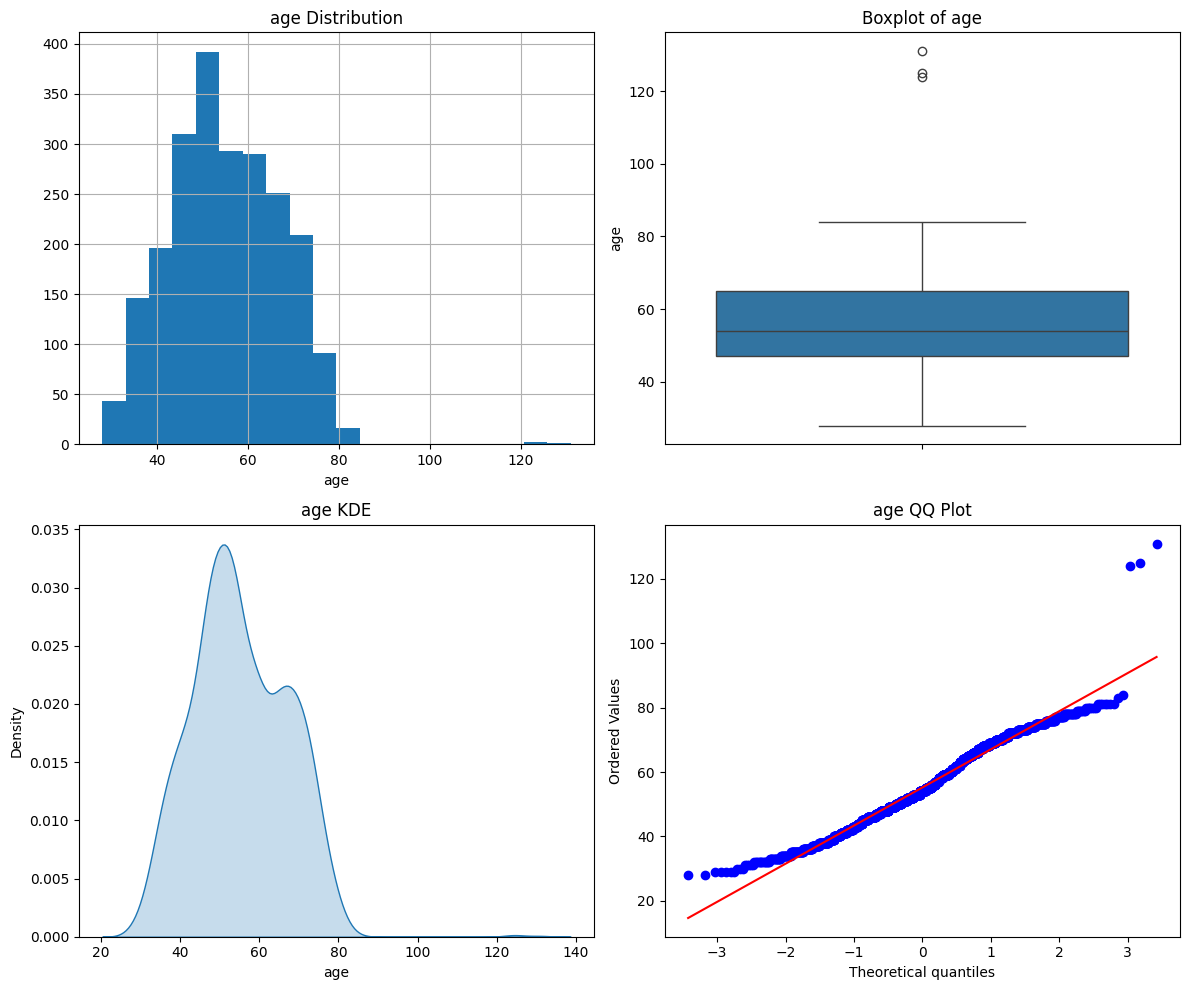

Numerical Column: total_spending
##########################################
count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
5%         22.000000
10%        34.900000
20%        55.000000
30%        91.000000
40%       194.600000
50%       396.000000
60%       635.400000
70%       926.000000
80%      1174.000000
90%      1536.200000
95%      1772.300000
99%      2126.000000
max      2525.000000
Name: total_spending, dtype: float64
##########################################


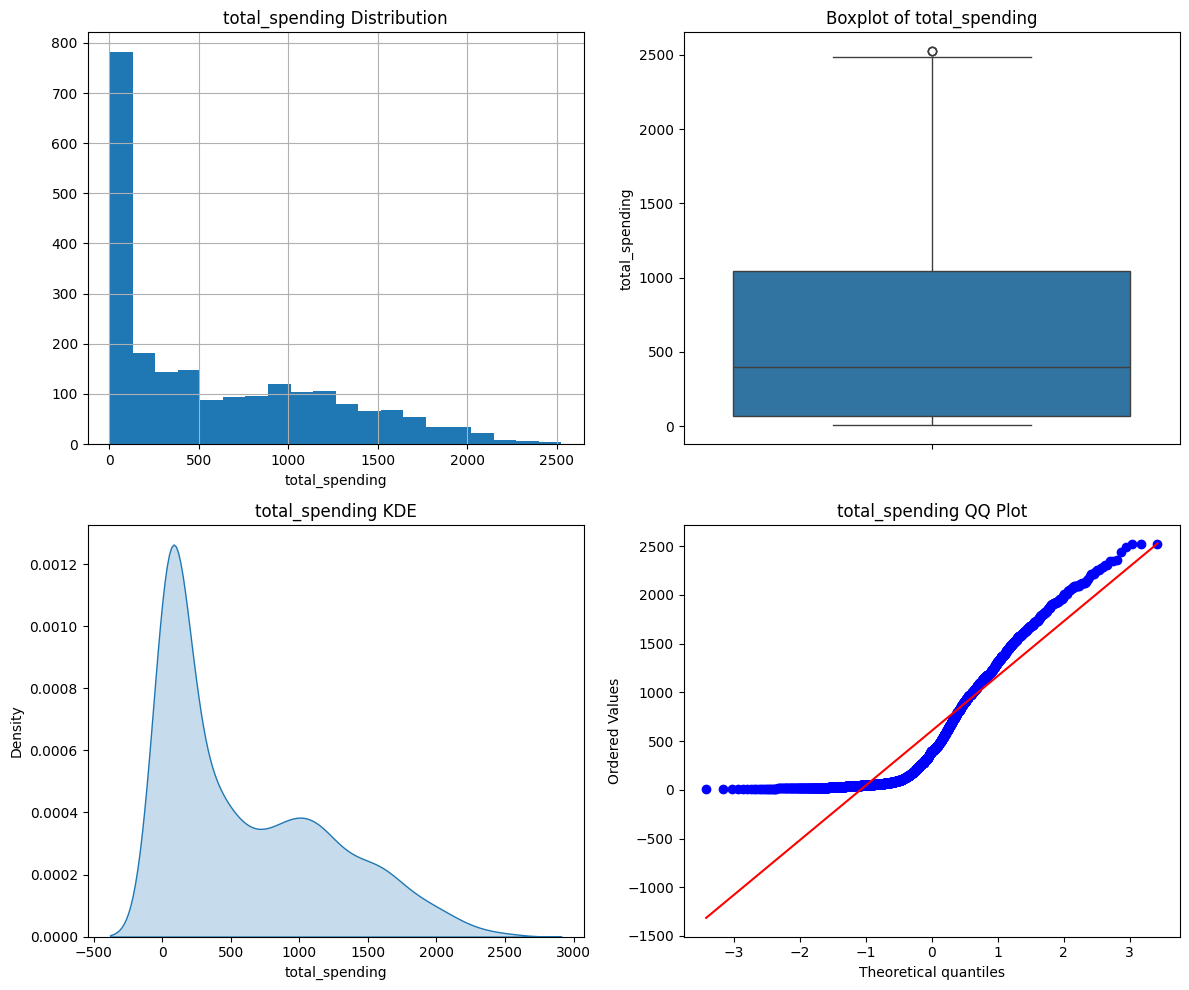

Numerical Column: days_as_customer
##########################################
count    2240.000000
mean     4148.582143
std       202.122512
min      3795.000000
5%       3833.000000
10%      3866.900000
20%      3937.000000
30%      4014.000000
40%      4079.600000
50%      4150.500000
60%      4218.000000
70%      4290.000000
80%      4359.000000
90%      4430.100000
95%      4462.000000
99%      4486.000000
max      4494.000000
Name: days_as_customer, dtype: float64
##########################################


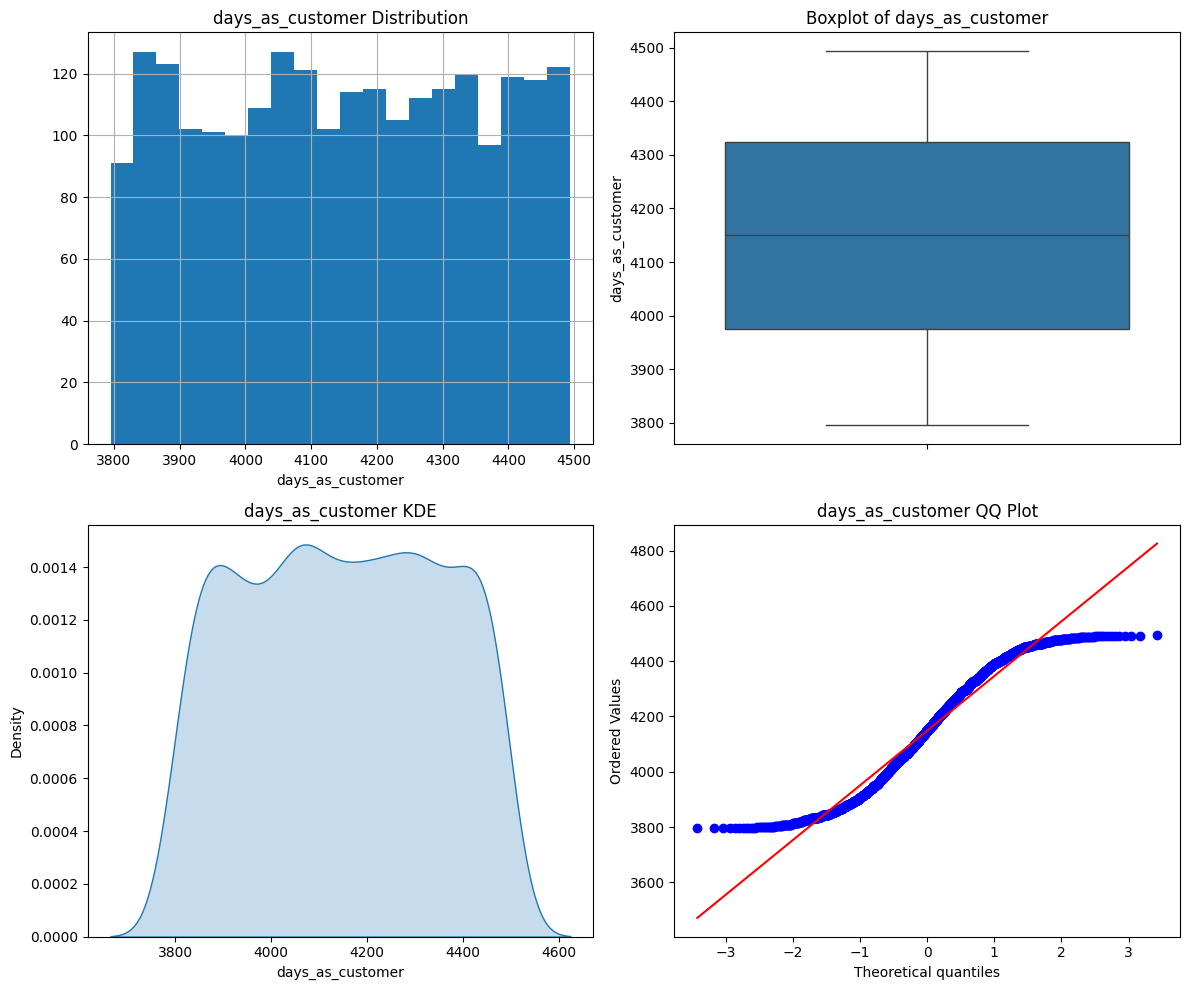

In [16]:
for col in numerical_cols:
    num_summary(dataframe=data_eda,
                numerical_col= col,
                plot= True)

## Non-Normal Distribution of Some Numerical Variables

### 1. Total Spending


* The `Distribution Plot`, `Box Plot`, `KDE Plot`, `QQ Plot` indicate that `total_spending` show a right-skewed distrubution, indicating that a significant amount of the data has lower spending values, while a smaller portion has much higher spending values.

* This skewness can potentially impact the model's performance, as many machine learning algorithms assume that the feature have normal distribution.

In [17]:
data_num = data_eda[numerical_cols]

In [18]:
data_num.head()

,income,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,age,total_spending,days_as_customer
0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,67,1617,4458
1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,70,27,3908
2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,59,776,4107
3,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,40,53,3934
4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,43,422,3956


In [19]:
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler, PowerTransformer

In [20]:
scaler = StandardScaler()
pt = PowerTransformer()
df =(
    data_num
    .assign(total_spending_log =  lambda df: np.log(df['total_spending']),
            total_spending_boxcox=lambda df: boxcox(df['total_spending'])[0],
            total_spending_scaled = lambda df: scaler.fit_transform(df[['total_spending']]),
            total_spending_pt = lambda df: pt.fit_transform(df[['total_spending']])


            )


)

In [21]:
skewed_num_cols = ["total_spending", "total_spending_log", "total_spending_boxcox", "total_spending_scaled", "total_spending_pt"]

Numerical Column: total_spending
##########################################
count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
5%         22.000000
10%        34.900000
20%        55.000000
30%        91.000000
40%       194.600000
50%       396.000000
60%       635.400000
70%       926.000000
80%      1174.000000
90%      1536.200000
95%      1772.300000
99%      2126.000000
max      2525.000000
Name: total_spending, dtype: float64
##########################################


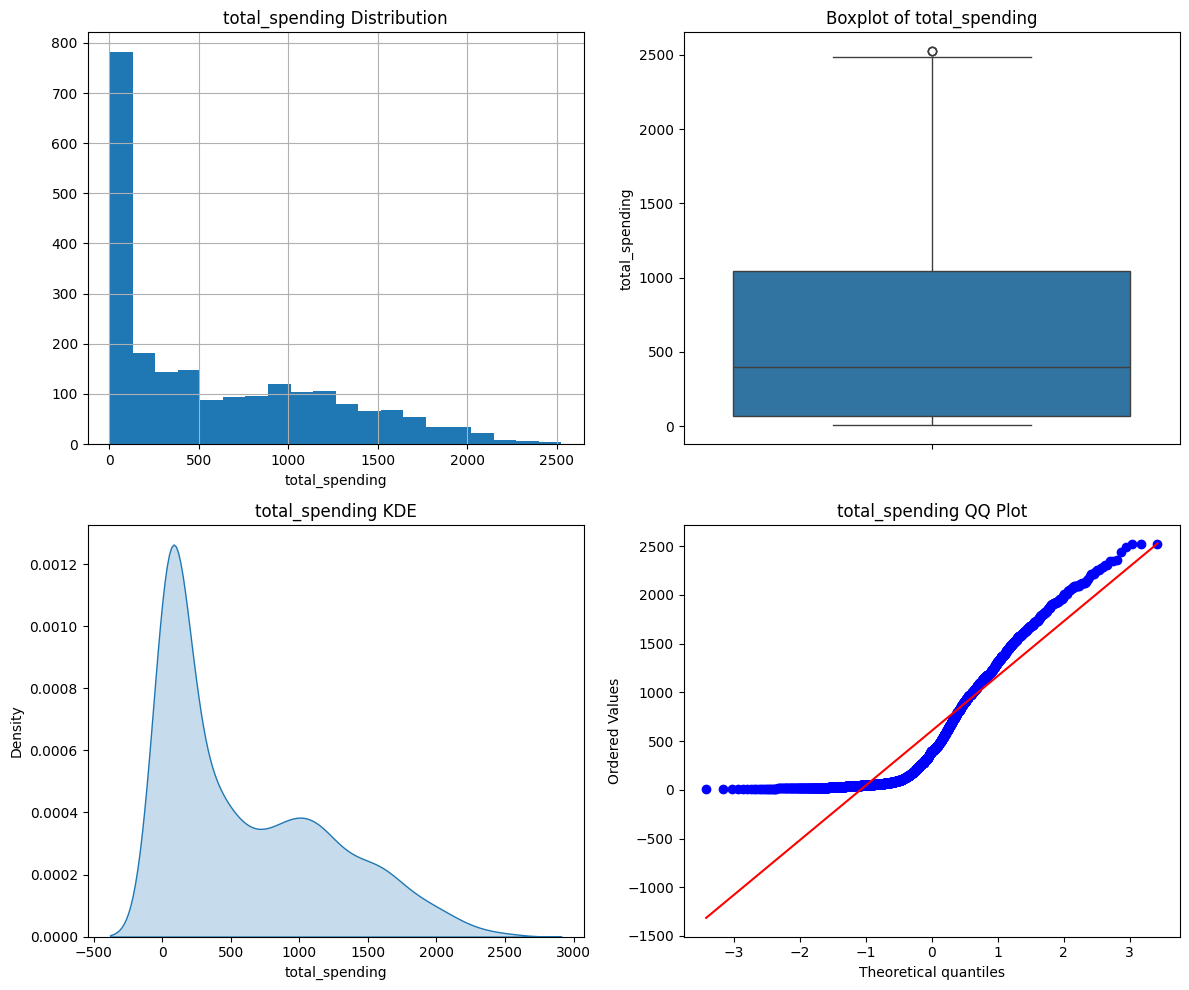

Numerical Column: total_spending_log
##########################################
count    2240.000000
mean        5.610026
std         1.483895
min         1.609438
5%          3.091042
10%         3.552449
20%         4.007333
30%         4.510860
40%         5.270943
50%         5.981414
60%         6.454254
70%         6.830874
80%         7.068172
90%         7.337067
95%         7.480033
99%         7.661998
max         7.833996
Name: total_spending_log, dtype: float64
##########################################


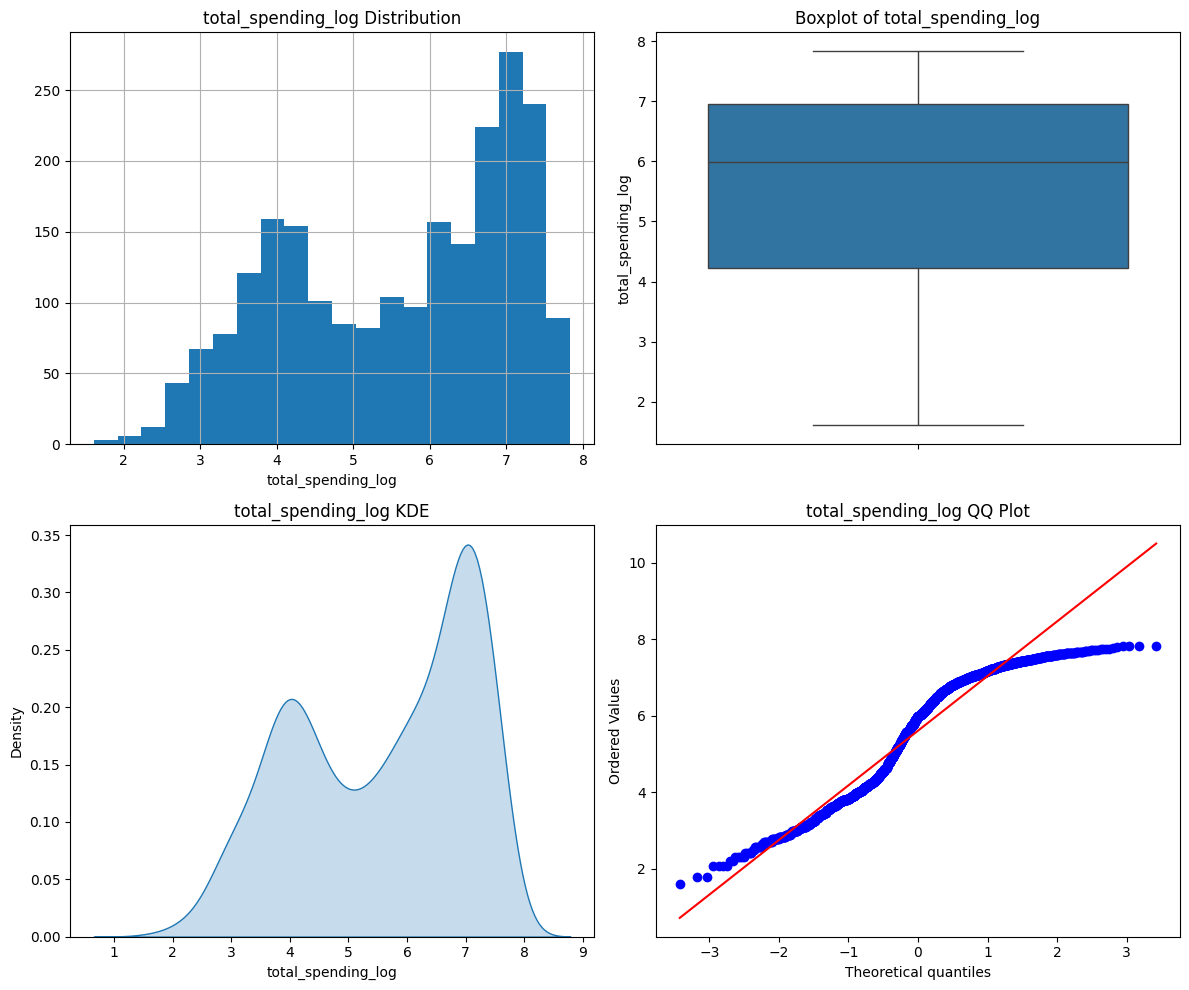

Numerical Column: total_spending_boxcox
##########################################
count    2240.000000
mean       10.205739
std         3.959976
min         1.865972
5%          4.131636
10%         4.969400
20%         5.866066
30%         6.947839
40%         8.777664
50%        10.729131
60%        12.172844
70%        13.413715
80%        14.239739
90%        15.219271
95%        15.759638
99%        16.467768
max        17.158714
Name: total_spending_boxcox, dtype: float64
##########################################


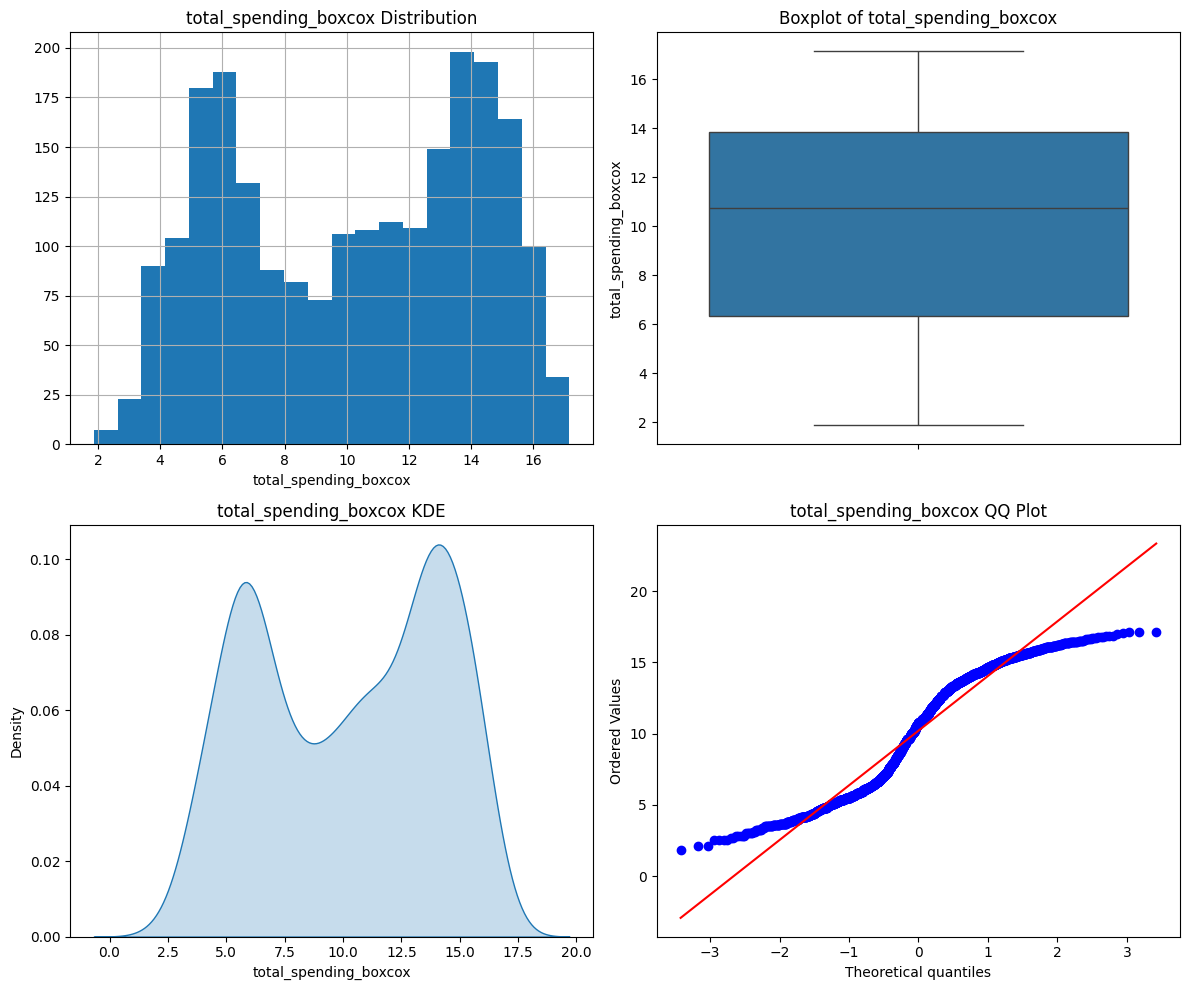

Numerical Column: total_spending_scaled
##########################################
count    2.240000e+03
mean     3.647876e-17
std      1.000223e+00
min     -9.978133e-01
5%      -9.695795e-01
10%     -9.481550e-01
20%     -9.147727e-01
30%     -8.549834e-01
40%     -6.829232e-01
50%     -3.484355e-01
60%      4.916302e-02
70%      5.317952e-01
80%      9.436768e-01
90%      1.545223e+00
95%      1.937341e+00
99%      2.524770e+00
max      3.187435e+00
Name: total_spending_scaled, dtype: float64
##########################################


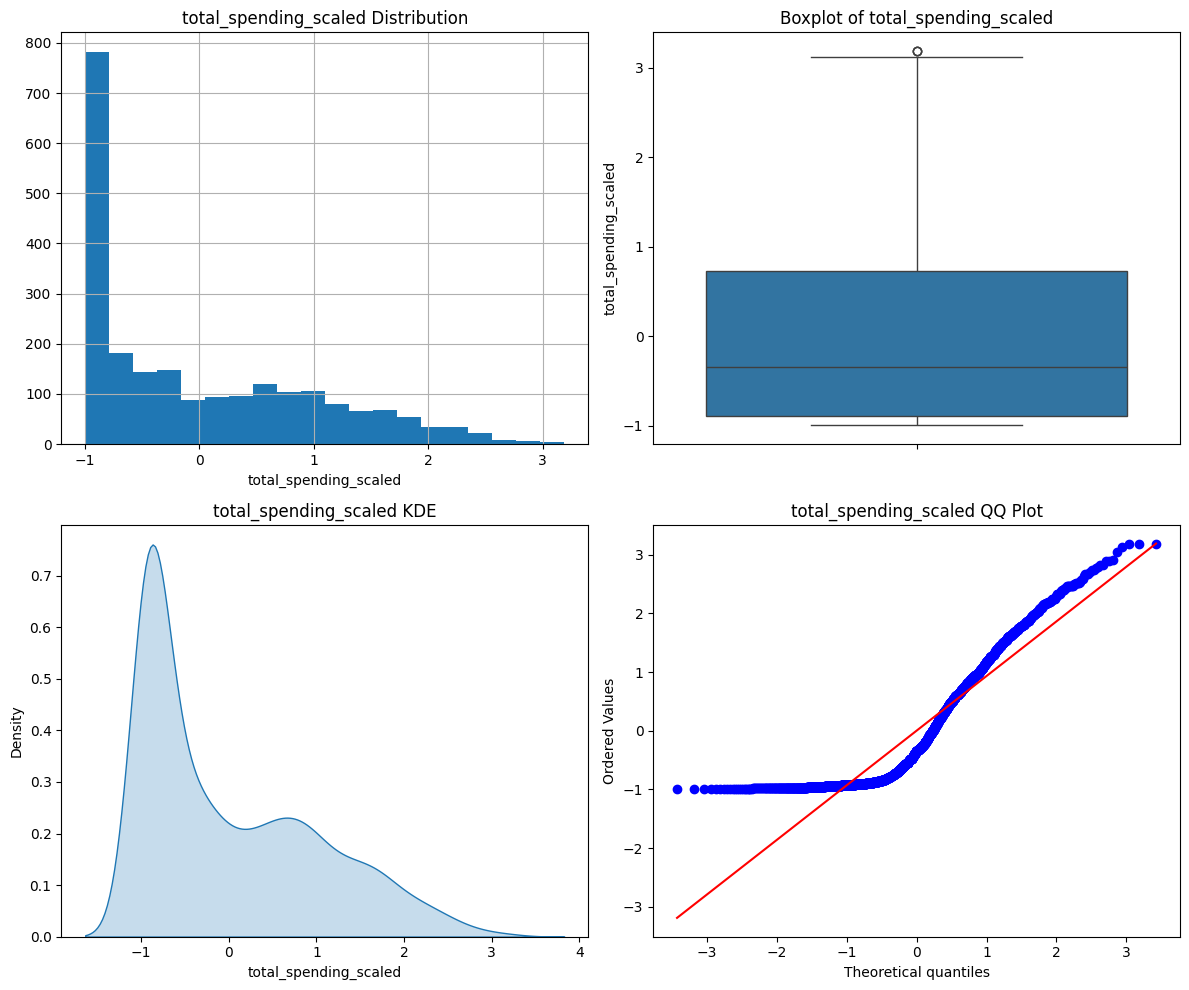

Numerical Column: total_spending_pt
##########################################
count    2.240000e+03
mean    -3.743038e-16
std      1.000223e+00
min     -2.069797e+00
5%      -1.531458e+00
10%     -1.323132e+00
20%     -1.098134e+00
30%     -8.252339e-01
40%     -3.621843e-01
50%      1.319654e-01
60%      4.972708e-01
70%      8.109568e-01
80%      1.019604e+00
90%      1.266846e+00
95%      1.403155e+00
99%      1.581693e+00
max      1.755801e+00
Name: total_spending_pt, dtype: float64
##########################################


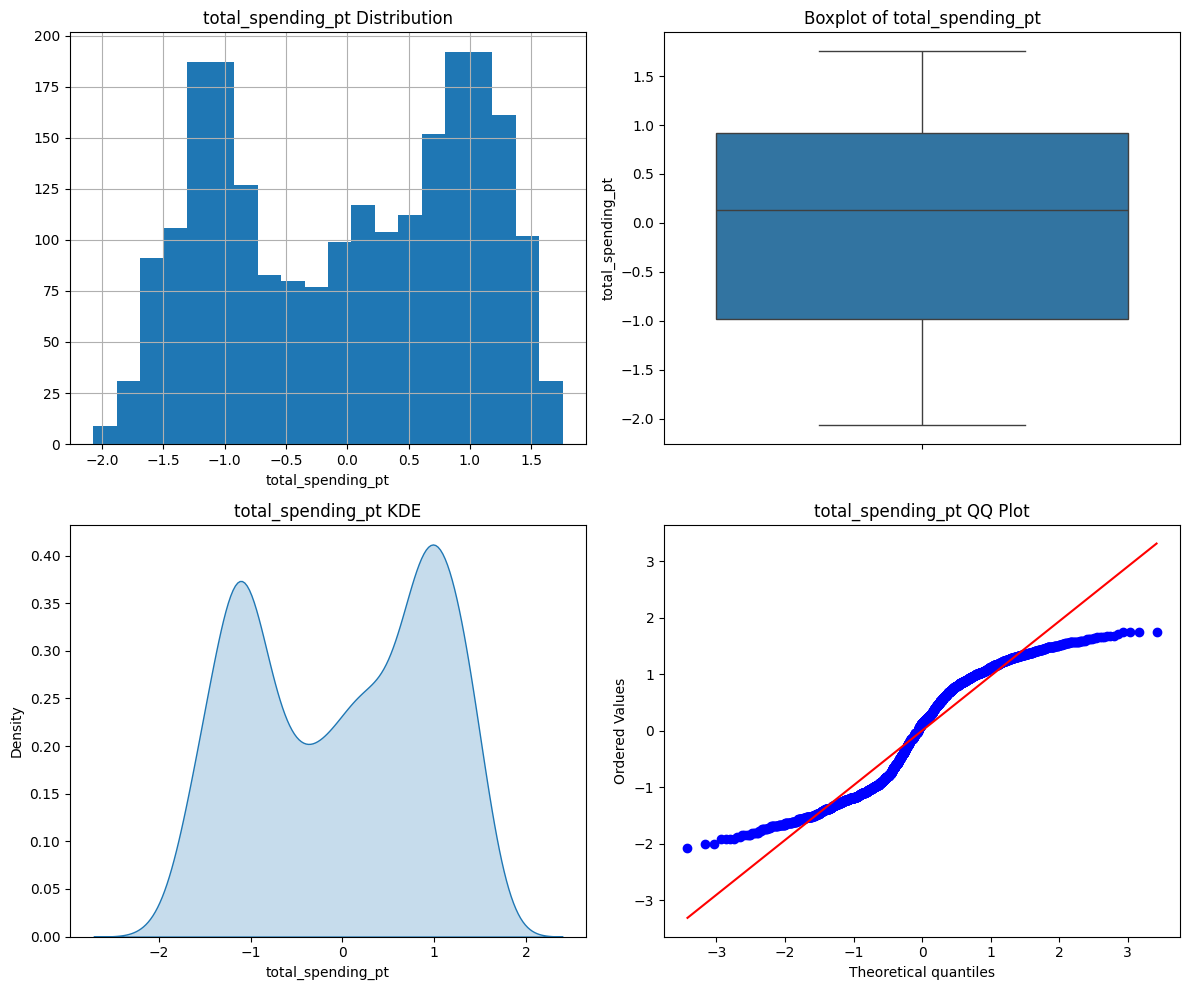

In [22]:
for col in skewed_num_cols:
    num_summary(dataframe=df,
                numerical_col= col,
                plot= True)

In [23]:
def target_summary_with_num(dataframe, target, numerical_col, bins=None):
    df = dataframe.copy()

    # Get summary stats for numerical column grouped by target
    summary_df = df.groupby(target).agg({numerical_col: "mean"})

    # If bins is not numeric, calculate appropriate bin edges
    if not isinstance(bins, (int, list)):
        # Automatically determine bin edges using numpy's histogram_bin_edges
        bins = np.histogram_bin_edges(df[numerical_col], bins='auto')

    # Bin the numerical column using pd.cut() with calculated bin edges
    df["binned"] = pd.cut(df[numerical_col], bins=bins, include_lowest=True)

    # Get summary stats for target grouped by the binned numerical column
    binned_summary_df = df.groupby("binned").agg({target: "mean"}).reset_index()

    return binned_summary_df, summary_df

In [24]:
target_summary_with_num(data_eda, 'response', numerical_col='education', bins=5)

(          binned  response
 0  (-0.005, 0.8]  0.037037
 1     (0.8, 1.6]  0.108374
 2     (1.6, 2.4]  0.134871
 3     (2.4, 3.2]  0.154054
 4     (3.2, 4.0]  0.207819,
           education
 response           
 0          2.418678
 1          2.697605)

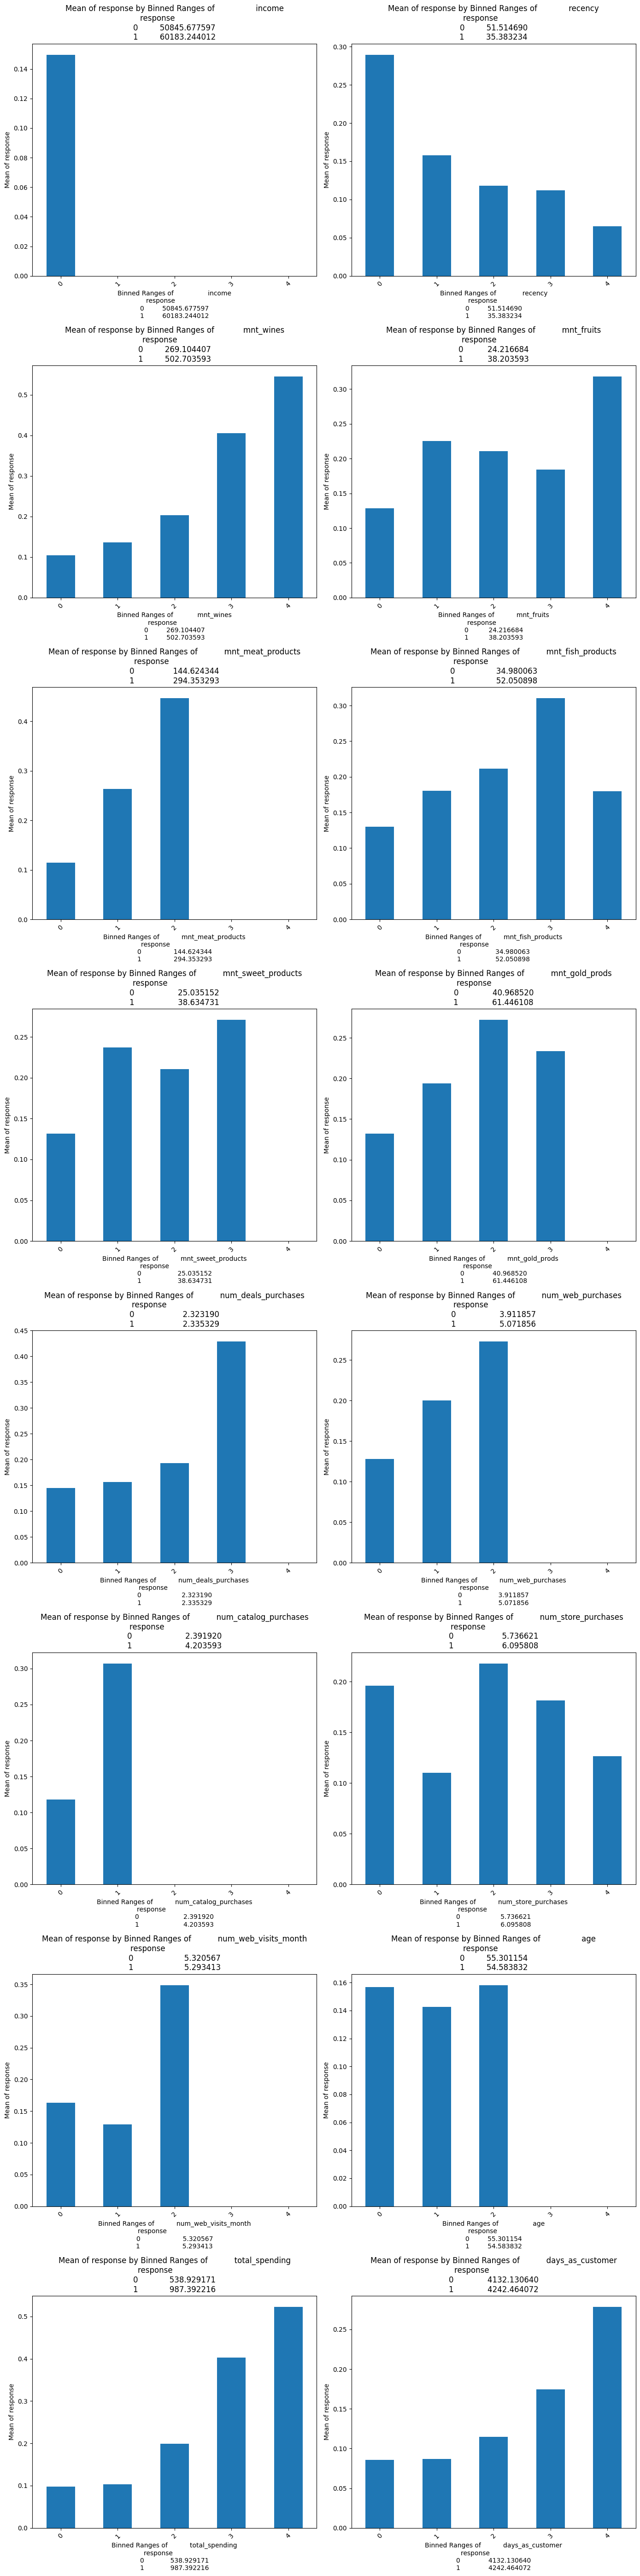

In [25]:
fig, axes = plt.subplots(nrows=(len(numerical_cols) + 1) // 2, ncols=2, figsize=(14, 7 * ((len(numerical_cols) + 1) // 2)))
target_col = "response"
for idx, col in enumerate(numerical_cols):
    binned_summary_df, col_name = target_summary_with_num(data_eda, target_col, col, bins=5)
    ax = axes[idx // 2, idx % 2]
    binned_summary_df.plot(kind="bar", legend=False, ax=ax)
    ax.set_title(f"Mean of {target_col} by Binned Ranges of {col_name}")
    ax.set_xlabel(f"Binned Ranges of {col_name}")
    ax.set_ylabel(f"Mean of {target_col}")
    ax.set_xticklabels(binned_summary_df.index, rotation=45)

plt.tight_layout()
plt.show()

In [26]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [27]:
rare_analyser(data_eda, target_col, categorical_cols)

education : 5
           COUNT     RATIO  TARGET_MEAN
education                              
0             54  0.024107     0.037037
1            203  0.090625     0.108374
2           1127  0.503125     0.134871
3            370  0.165179     0.154054
4            486  0.216964     0.207819


accepted_cmp3 : 2
               COUNT     RATIO  TARGET_MEAN
accepted_cmp3                              
0               2077  0.927232     0.123736
1                163  0.072768     0.472393


accepted_cmp4 : 2
               COUNT     RATIO  TARGET_MEAN
accepted_cmp4                              
0               2073  0.925446     0.131211
1                167  0.074554     0.371257


accepted_cmp5 : 2
               COUNT     RATIO  TARGET_MEAN
accepted_cmp5                              
0               2077  0.927232     0.116514
1                163  0.072768     0.564417


accepted_cmp1 : 2
               COUNT     RATIO  TARGET_MEAN
accepted_cmp1                              
0         

In [29]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

In [31]:
new_df = rare_encoder(data_eda, 0.01)

In [32]:
rare_analyser(new_df, target_col, categorical_cols)

education : 5
           COUNT     RATIO  TARGET_MEAN
education                              
0             54  0.024107     0.037037
1            203  0.090625     0.108374
2           1127  0.503125     0.134871
3            370  0.165179     0.154054
4            486  0.216964     0.207819


accepted_cmp3 : 2
               COUNT     RATIO  TARGET_MEAN
accepted_cmp3                              
0               2077  0.927232     0.123736
1                163  0.072768     0.472393


accepted_cmp4 : 2
               COUNT     RATIO  TARGET_MEAN
accepted_cmp4                              
0               2073  0.925446     0.131211
1                167  0.074554     0.371257


accepted_cmp5 : 2
               COUNT     RATIO  TARGET_MEAN
accepted_cmp5                              
0               2077  0.927232     0.116514
1                163  0.072768     0.564417


accepted_cmp1 : 2
               COUNT     RATIO  TARGET_MEAN
accepted_cmp1                              
0         

In [33]:
for col in numerical_cols:
    print(col, check_outlier(data_eda, col))

income True
recency False
mnt_wines False
mnt_fruits False
mnt_meat_products True
mnt_fish_products False
mnt_sweet_products False
mnt_gold_prods False
num_deals_purchases True
num_web_purchases True
num_catalog_purchases True
num_store_purchases False
num_web_visits_month True
age False
total_spending False
days_as_customer False


In [34]:
for col in numerical_cols:
    new_df = remove_outlier(data_eda, col)

In [35]:
data_eda.shape[0] - new_df.shape[0]

0

In [36]:
for col in numerical_cols:
    replace_with_thresholds(data_eda, col)

In [37]:
for col in numerical_cols:
    print(col, check_outlier(data_eda, col))

income False
recency False
mnt_wines False
mnt_fruits False
mnt_meat_products False
mnt_fish_products False
mnt_sweet_products False
mnt_gold_prods False
num_deals_purchases False
num_web_purchases False
num_catalog_purchases False
num_store_purchases False
num_web_visits_month False
age False
total_spending False
days_as_customer False


In [38]:
na_cols = missing_values_table(data_eda, True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [39]:
missing_vs_target(data_eda, target_col, na_cols)

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(considered_features, df):

    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["variable"] = X.columns
    vif["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['variable']!='intercept']
    return vif


#we will remove the datetime column which is not required for the vif checking
cont_features = numerical_cols.copy()

# we will not chech vif for total spending, as it is the summation of Wines,Fruits,Meat,Fish,Sweets,Gold.
cont_features.remove('total_spending')
compute_vif(cont_features, df)
# other_columns

,variable,vif
0,income,2.125893
1,recency,1.004938
2,mnt_wines,2.642362
3,mnt_fruits,1.933450
4,mnt_meat_products,2.757364
5,mnt_fish_products,2.068554
6,mnt_sweet_products,1.898322
7,mnt_gold_prods,1.484205
8,num_deals_purchases,1.343214
9,num_web_purchases,1.875230


Based on the calculated VIF table, we can identify the following:

* Interpreting VIF Values:

    * VIF = 1: No multicollinearity.
    * VIF between 1 and 5: Moderate multicollinearity.
    * VIF greater than 5: High multicollinearity.

* Variables with moderate Multicollinearity:

    * num_catalog_purchases (VIF = 2.904230)
    * mnt_meat_products (VIF = 2.757364)
    * mnt_wines (VIF = 2.642362)
    * num_web_visits_month (VIF = 2.533032)
    * num_store_purchases (VIF = 2.263469)
    * mnt_fish_products (VIF = 2.068554)
    * income (VIF = 2.125893)

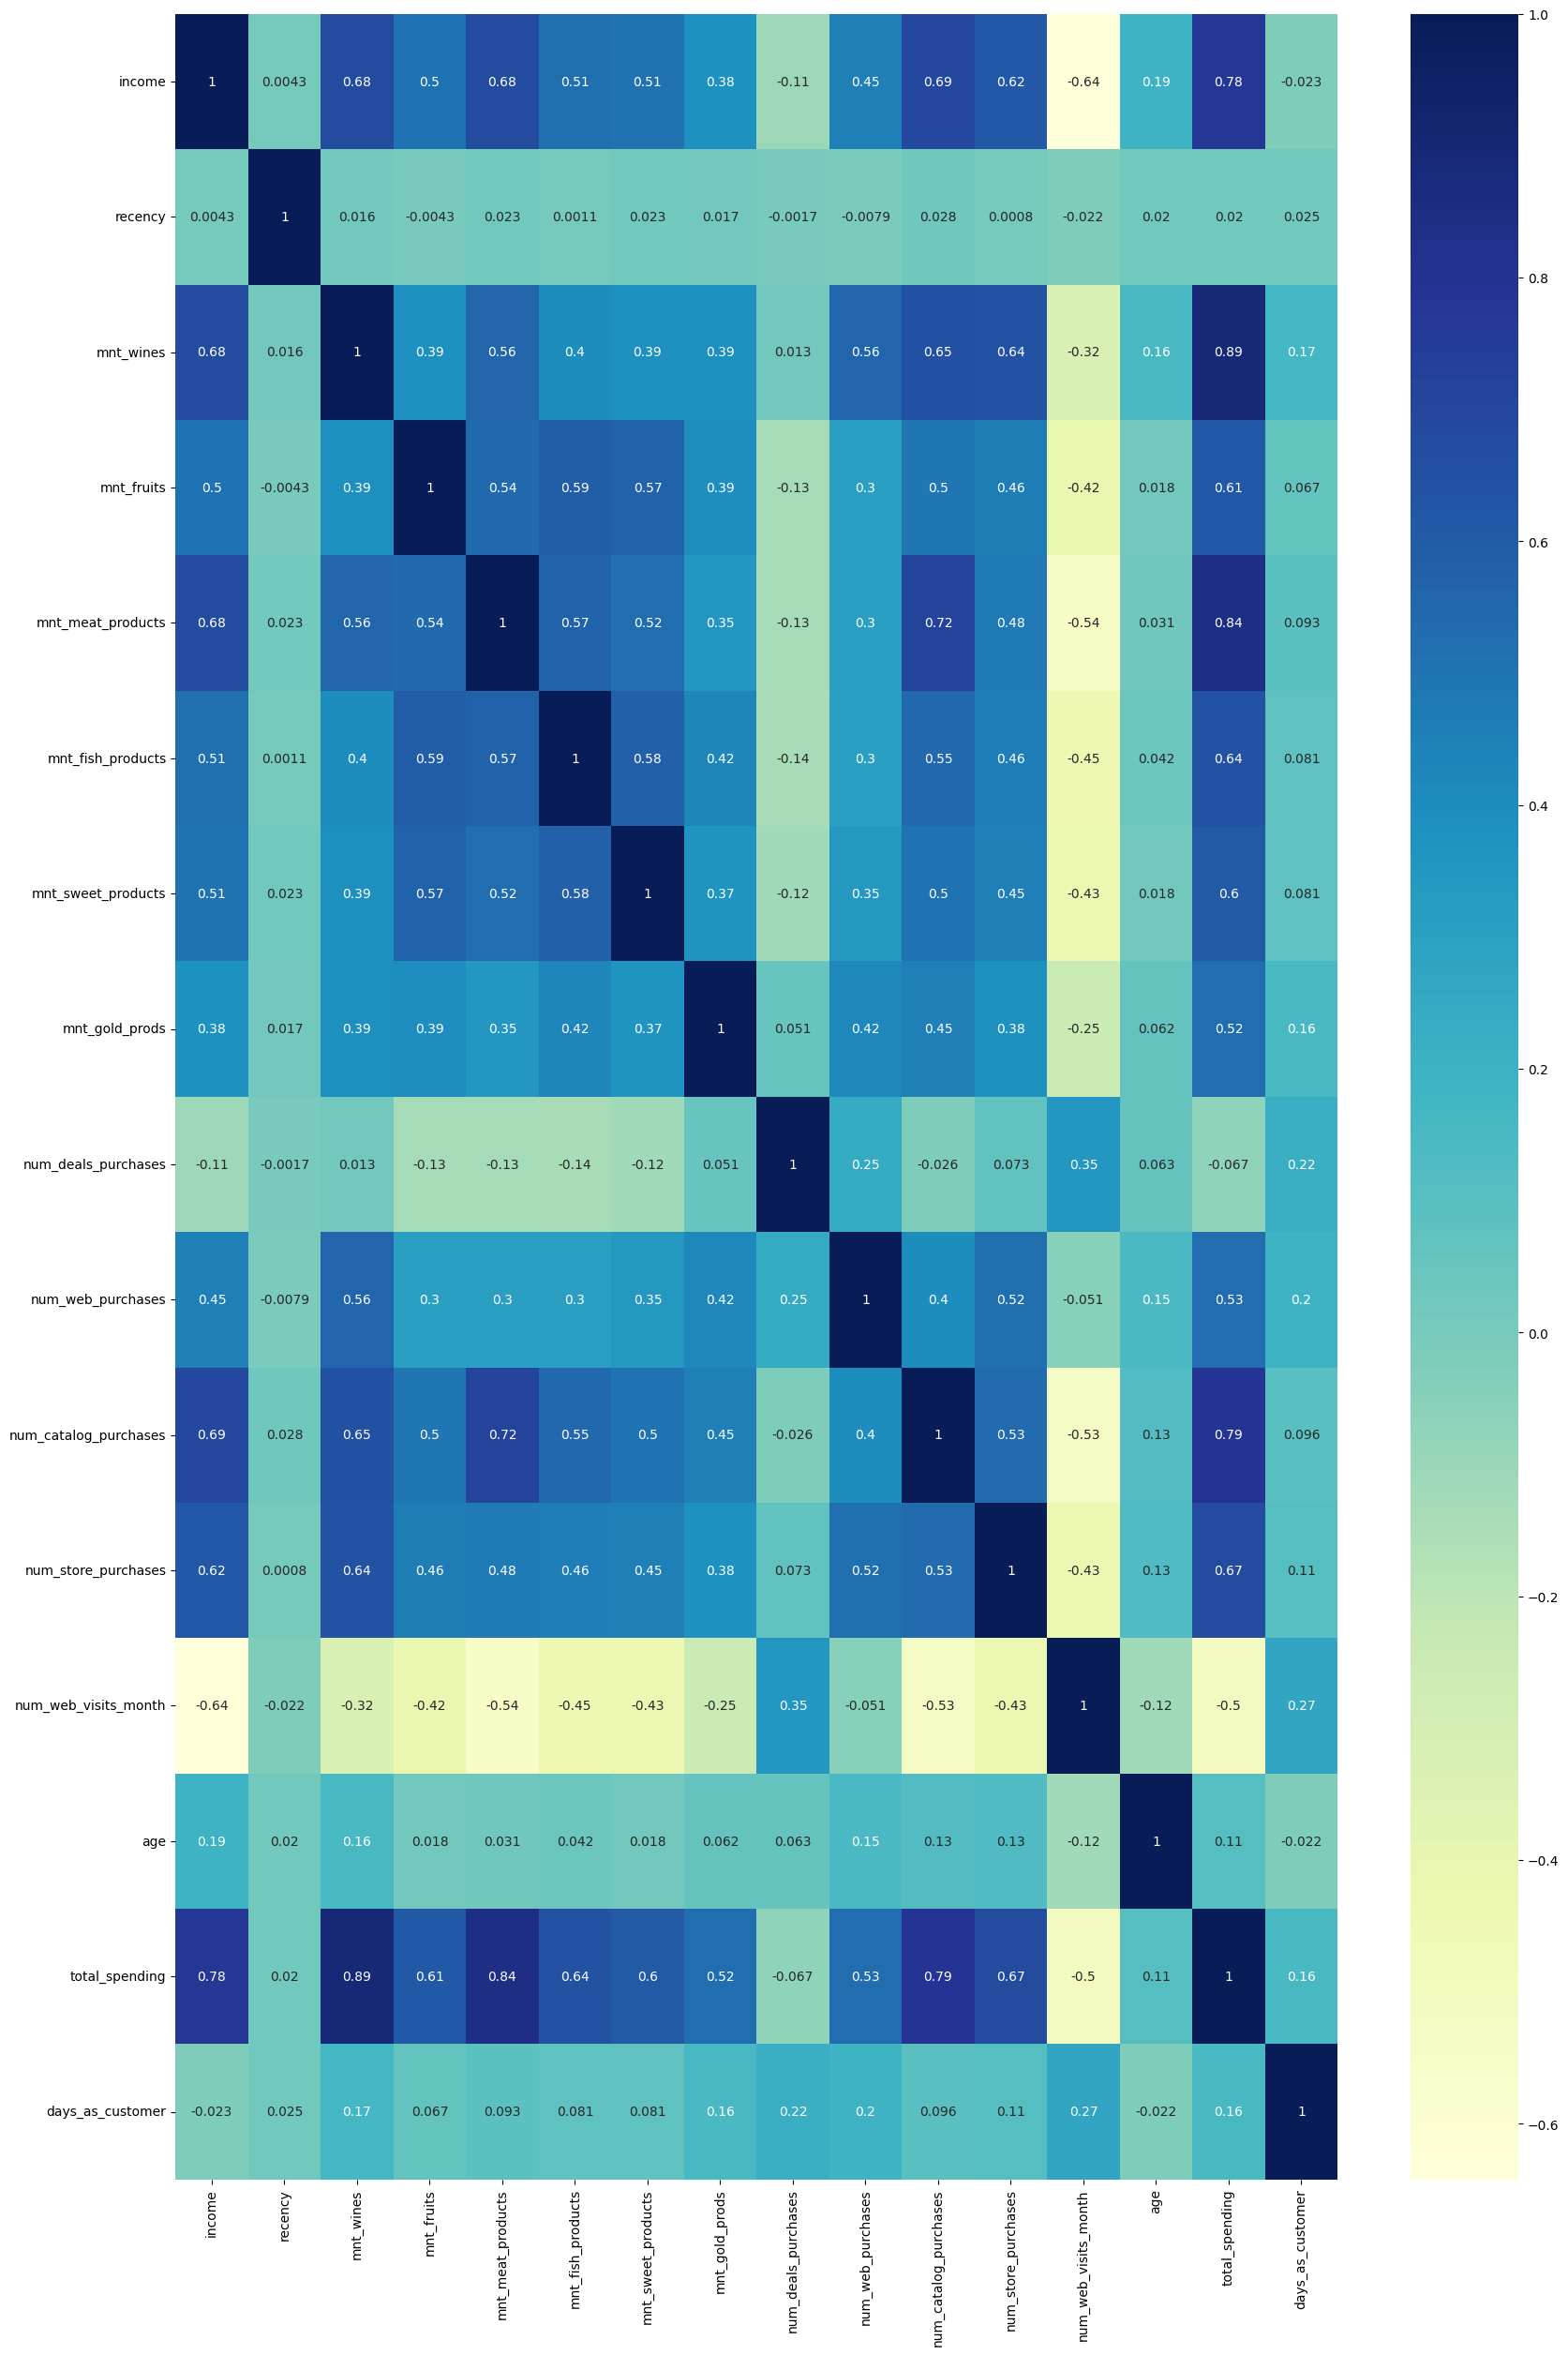

In [43]:
plt.figure(figsize = (20,30))
#num_features = numeric_features.copy()

sns.heatmap(data_eda[numerical_cols].corr(), annot=True, cmap="YlGnBu")
plt.show()